# DEMO - Regression Model
---
writer : Riki

## **Introduction**

**Background**

This notebook aims to demonstrate a simple modeling process for linear regression analysis using Python. Linear regression is a statistical technique that allows us to estimate the relationship between a dependent variable and one or more independent variables. It involves three main steps: 
1. examining the correlation and directionality of the data, 
1. fitting the line that best describes the data, and 
1.  evaluating the validity and usefulness of the model by checking its assumptions and performance. 

This notebook is designed as a supplementary learning material for the Hacktiv8 data science bootcamp program, which is a 12-week intensive course that trains beginners to become data analysts and data scientists. Some sections of this notebook are not very detailed, because the purpose of this notebook is to provide a general overview of the modeling process and encourage the students to explore and experiment with the data on their own. 

The case that would be used in this model process is about house sale price, that contains information about house sales in various locations, with 81 features and around 66,000 rows. Some of the features include lot area, number of bedrooms, garage type, sale price, etc.

**Problem Statement**

The goal of this project is to build a regression model that can accurately predict the sale price of a house based on various features. This model can help potential buyers and sellers to make informed decisions and negotiate fair prices in the housing market.

**Problem Statement Exploration**
- How many houses are sold in each location?
- What are the characteristics of the houses that have high or low sale prices?
- How does the sale price vary with different features, such as lot area, number of bedrooms, garage type, etc.?
- Which features are the most important for predicting the sale price of a house?
- How well can a linear regression model fit the data and explain the variation in the sale price?
- etc.

**Dataset**
- Title : House Sale Data
- Source : [Click Here!](https://www.kaggle.com/datasets/animeshparikshya/house-sale-data-81-column)


| Column | Description |
| --- | --- |
| Id | Unique identification number for each house |
| MSSubClass | The building class |
| MSZoning | The general zoning classification |
| LotFrontage | Linear feet of street connected to property |
| LotArea | Lot size in square feet |
| Street | Type of road access |
| Alley | Type of alley access |
| LotShape | General shape of property |
| LandContour | Flatness of the property |
| Utilities | Type of utilities available |
| LotConfig | Lot configuration |
| LandSlope | Slope of property |
| Neighborhood | Physical locations within city limits |
| Condition1 | Proximity to main road or railroad |
| Condition2 | Proximity to main road or railroad (if a second is present) |
| BldgType | Type of dwelling |
| HouseStyle | Style of dwelling |
| OverallQual | Overall material and finish quality |
| OverallCond | Overall condition rating |
| YearBuilt | Original construction date |
| YearRemodAdd | Remodel date |
| RoofStyle | Type of roof |
| RoofMatl | Roof material |
| Exterior1st | Exterior covering on house |
| Exterior2nd | Exterior covering on house (if more than one material) |
| MasVnrType | Masonry veneer type |
| MasVnrArea | Masonry veneer area in square feet |
| ExterQual | Exterior material quality |
| ExterCond | Present condition of the material on the exterior |
| Foundation | Type of foundation |
| BsmtQual | Height of the basement |
| BsmtCond | General condition of the basement |
| BsmtExposure | Walkout or garden level basement walls |
| BsmtFinType1 | Quality of basement finished area |
| BsmtFinSF1 | Type 1 finished square feet |
| BsmtFinType2 | Quality of second finished area (if present) |
| BsmtFinSF2 | Type 2 finished square feet |
| BsmtUnfSF | Unfinished square feet of basement area |
| TotalBsmtSF | Total square feet of basement area |
| Heating | Type of heating |
| HeatingQC | Heating quality and condition |
| CentralAir | Central air conditioning |
| Electrical | Electrical system |
| 1stFlrSF | First Floor square feet |
| 2ndFlrSF | Second floor square feet |
| LowQualFinSF | Low quality finished square feet (all floors) |
| GrLivArea | Above grade (ground) living area square feet |
| BsmtFullBath | Basement full bathrooms |
| BsmtHalfBath | Basement half bathrooms |
| FullBath | Full bathrooms above grade |
| HalfBath | Half baths above grade |
| Bedroom | Number of bedrooms above basement level |
| Kitchen | Number of kitchens |
| KitchenQual | Kitchen quality |
| TotRmsAbvGrd | Total rooms above grade (does not include bathrooms) |
| Functional | Home functionality rating |
| Fireplaces | Number of fireplaces |
| FireplaceQu | Fireplace quality |
| GarageType | Garage location |
| GarageYrBlt | Year garage was built |
| GarageFinish | Interior finish of the garage |
| GarageCars | Size of garage in car capacity |
| GarageArea | Size of garage in square feet |
| GarageQual | Garage quality |
| GarageCond | Garage condition |
| PavedDrive | Paved driveway |
| WoodDeckSF | Wood deck area in square feet |
| OpenPorchSF | Open porch area in square feet |
| EnclosedPorch | Enclosed porch area in square feet |
| 3SsnPorch | Three season porch area in square feet |
| ScreenPorch | Screen porch area in square feet |
| PoolArea | Pool area in square feet |
| PoolQC | Pool quality |
| Fence | Fence quality |
| MiscFeature | Miscellaneous feature not covered in other categories |
| MiscVal | $Value of miscellaneous feature |
| MoSold | Month Sold |
| YrSold | Year Sold |
| SaleType | Type of sale |
| SaleCondition | Condition of sale |
| SalePrice | The property's sale price in dollars. This is the target variable that you're trying to predict. |

## **Import Libraries**

Import libraries or packages that needed into the notebook

In [1]:
# Library for dataframe and manipulation
import numpy as np
import pandas as pd

# Library for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libaries related to feature engineering
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from scipy.stats import kendalltau
from scipy.stats import chi2_contingency, spearmanr
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder

# Model
from sklearn.linear_model import LinearRegression

# Library for metrics or model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Library for warnings
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Setting Random seed, so any code output will still remain in other running time
np.random.seed(9090)

## **Data Loading**

In [2]:
# Load the dataset
data = pd.read_csv('train.csv')

# Show the first 5 data
print('The first 5 rows data')
display(data.head())

# Show the last 5 data
print('The last 5 rows data')
display(data.tail())

The first 5 rows data


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The last 5 rows data


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


The data successfully loaded into the notebook, next check the dataset info to understand the data

In [3]:
# Check the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- Dataset has 1460 rows with 81 columns
- Consists of 3 columns of floats, 35 columns of integers and 43 columns of objects
- There are indication that the dataset has missing value. Thus, we need to handle it later in feature engineering

## **Exploratory Data Analysis**

Before we continue we will copy the original dataset in order to keep the real data in case there is something unwanted during the data manipulation process

In [4]:
# copy dataframe for visualization, in order to keep the original data
data_viz = data.copy()

### Missing Value Analysis

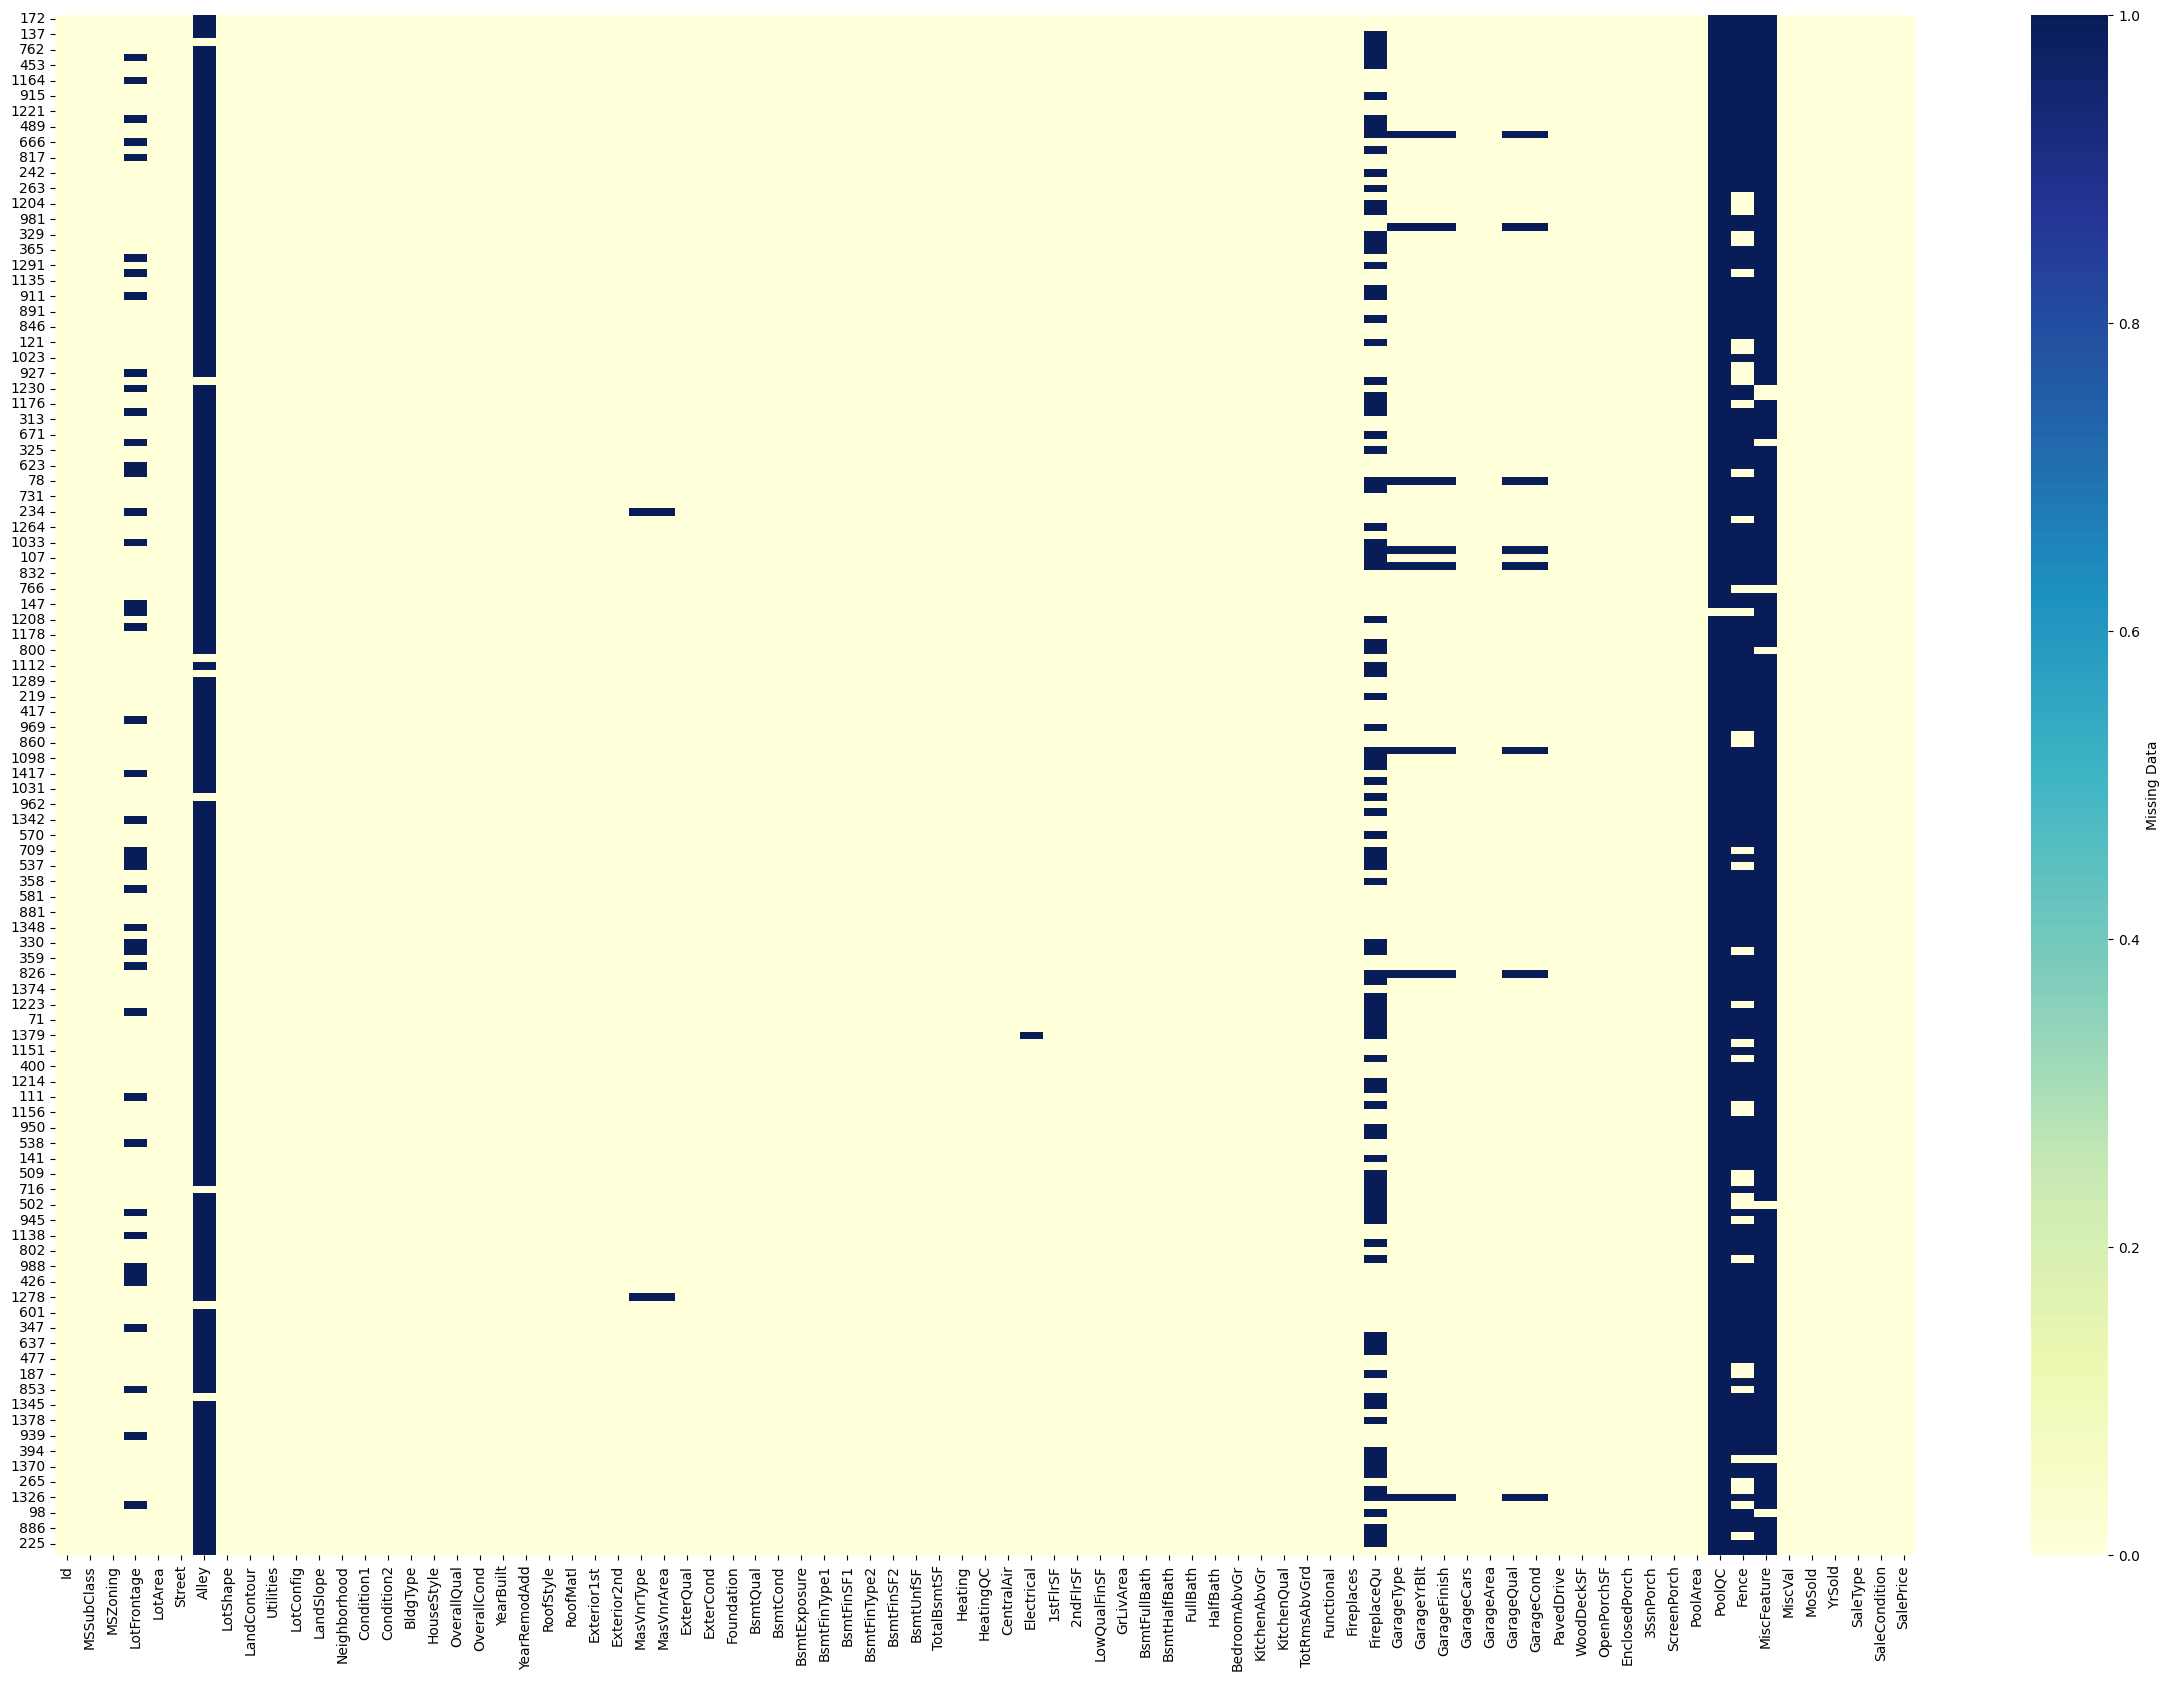

In [5]:
# Create Canvas
plt.figure(figsize=(30,20))

# Visualize the missing value using heatmap
sns.heatmap(data_viz.sample(200).isna(), cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

# show the plot
plt.show()

As we could see from the sample above, the heatmap does not really have any significant patterns. However it shows possibilities for MCAR and MAR types for certains columns.

***Notes** :* please remember this is just an example, that might not reprensent the actual data missing values. you need to explore more to get the conclusion

### How many houses are sold in each location?

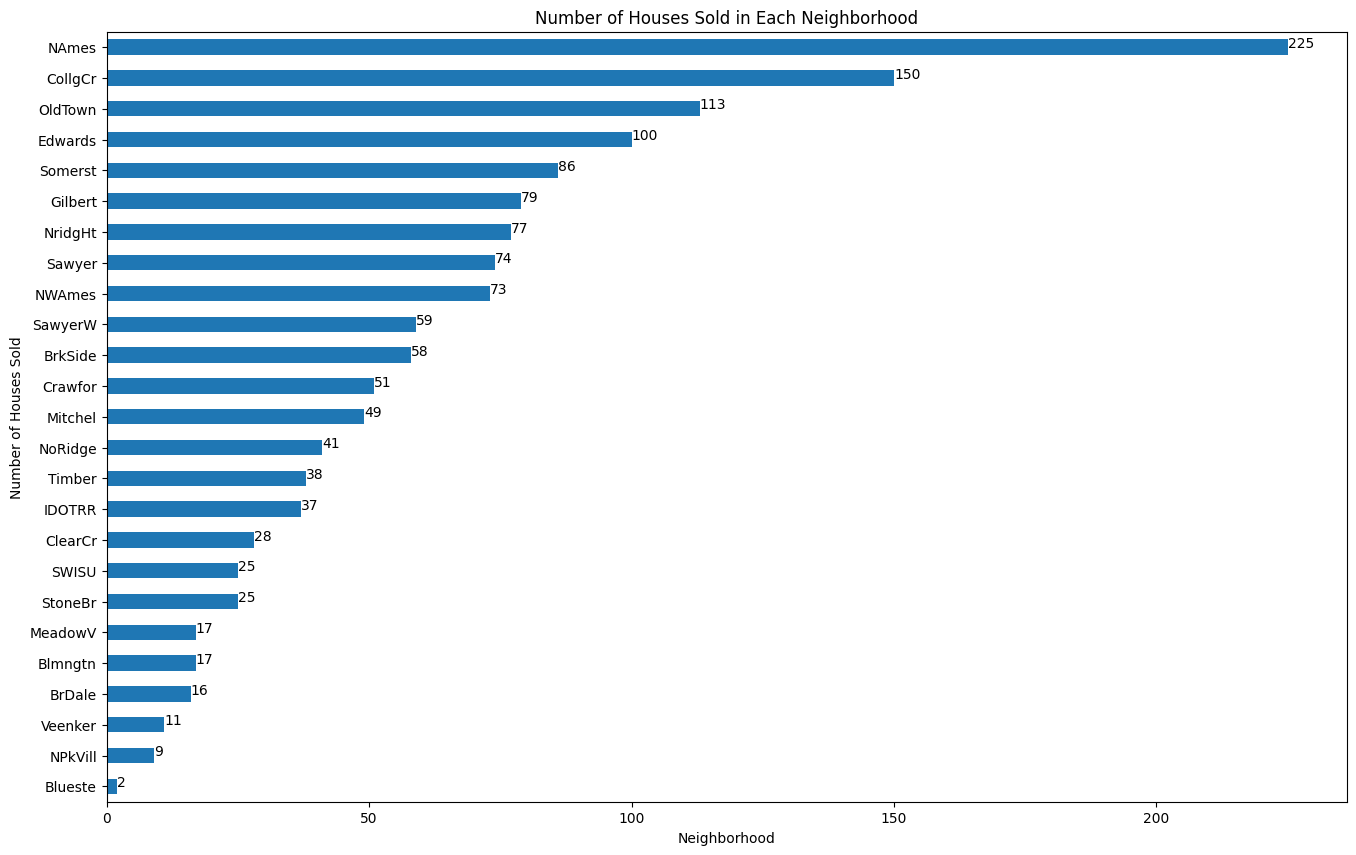

In [6]:
# Create the plot canvas
plt.figure(figsize=(16,10))

# The Bar plot
data_viz['Neighborhood'].value_counts(ascending=True).plot(kind='barh')
plt.title('Number of Houses Sold in Each Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Houses Sold')

# Annotate the bars with the count of houses sold
for index, value in enumerate(data_viz['Neighborhood'].value_counts(ascending=True)):
    plt.text(value, index, str(value))

# Show the plot
plt.show()


Here are some insights:

- **NAmes** is the neighborhood with the **highest number of houses sold**, with a total of **225 houses**. This could indicate that NAmes is a popular or densely populated neighborhood.
- **CollgCr** and **OldTown** also have a high number of houses sold, with **150** and **113** houses respectively. These neighborhoods might also be popular choices for homebuyers.
- On the other hand, neighborhoods like **NPkVill** and **Blueste** have significantly fewer houses sold, with only **9** and **2** houses respectively. These neighborhoods might be smaller, less popular, or have fewer houses available for sale.
- The data shows a wide range of houses sold across different neighborhoods, from as high as **225** in NAmes to as low as **2** in Blueste. This could suggest a diverse housing market with a wide range of options for homebuyers.

***Please note*** that these insights are based on the number of houses sold in each neighborhood. Other factors such as the size of the neighborhood, the number of houses available for sale, and the desirability of the location could also affect these numbers. To get a more comprehensive understanding of the housing market, you might want to consider these factors as well. 

### What are the characteristics of the houses that have high or low sale prices?

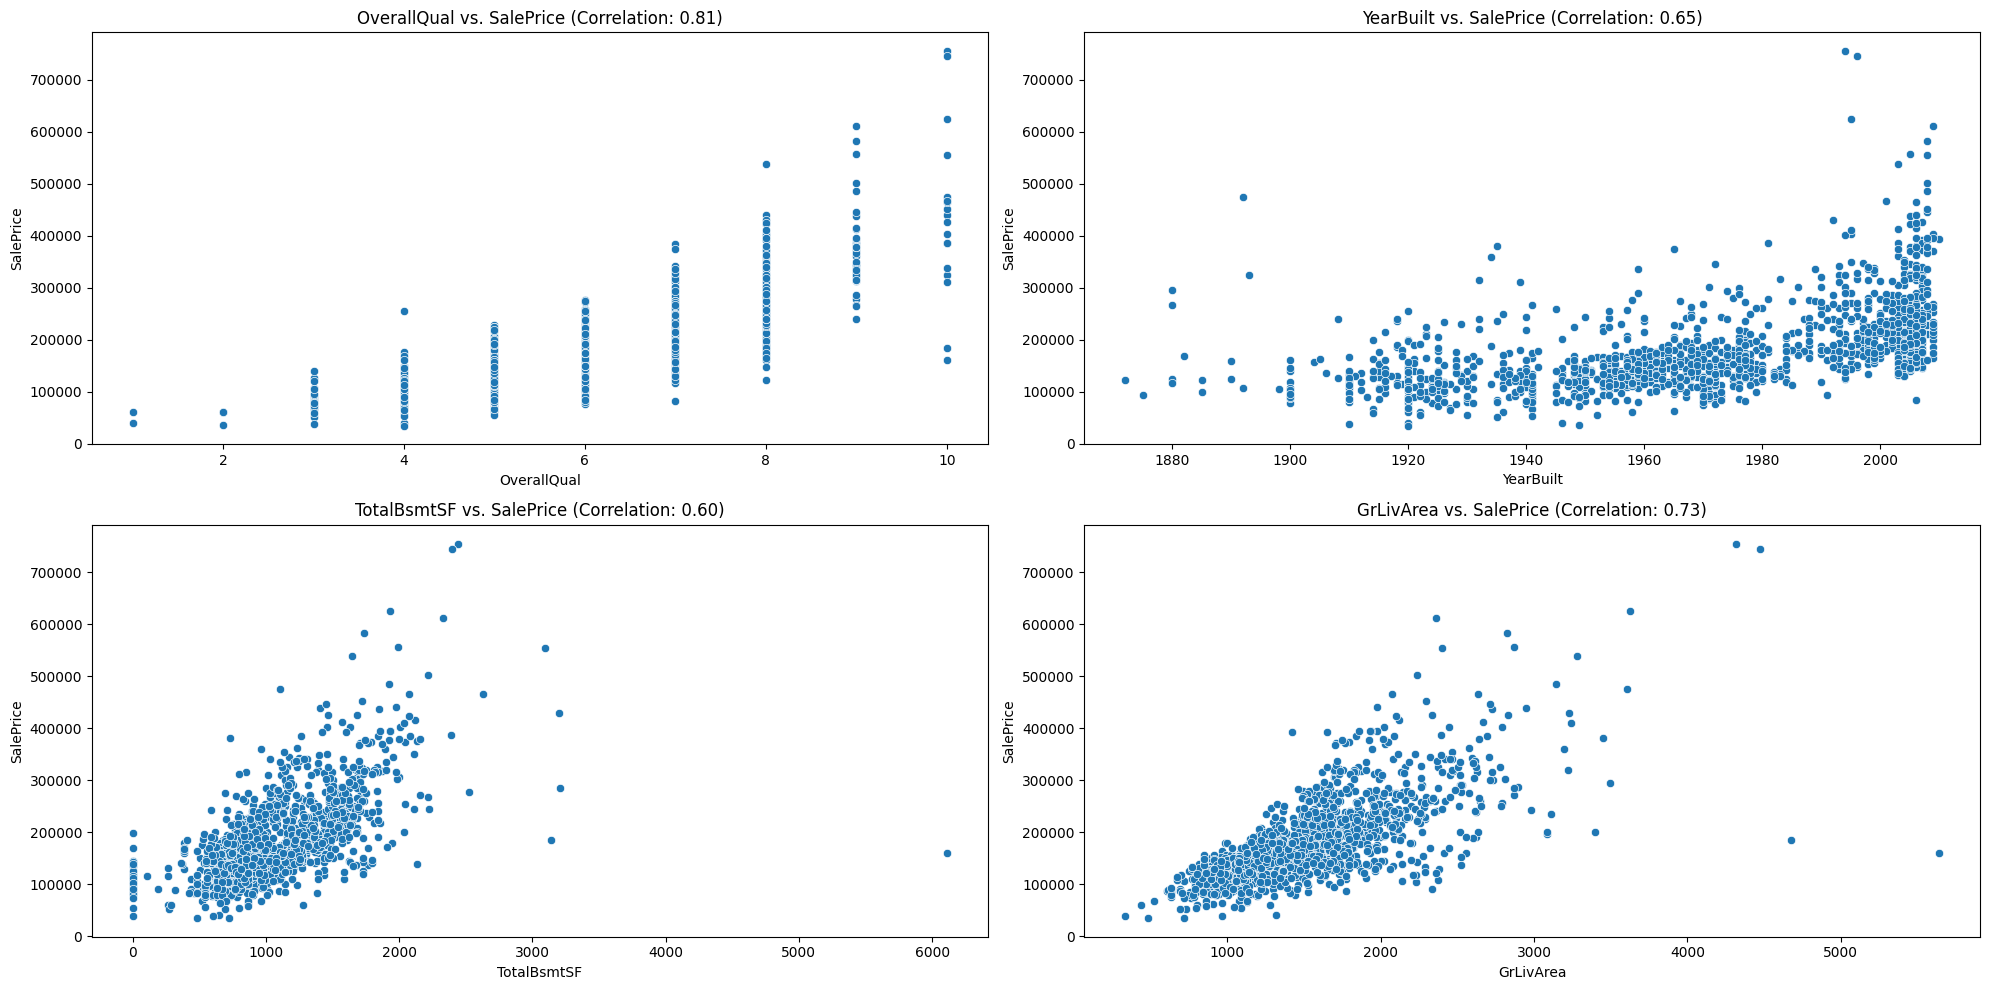

In [7]:
# List of features you're interested in
features = ['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea']

# Create a subplot for each feature
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

for i, feature in enumerate(features):
    # Calculate the correlation between the feature and SalePrice
    correlation = data_viz[feature].corr(data_viz['SalePrice'], method='spearman')
    
    # Create a scatter plot of the feature vs. SalePrice
    sns.scatterplot(data=data_viz, x=feature, y='SalePrice', ax=axs[i//2, i%2])
    
    # Set the title to include the correlation
    axs[i//2, i%2].set_title(f'{feature} vs. SalePrice (Correlation: {correlation:.2f})')

plt.tight_layout()
plt.show()


Insights :
1. **Overall Quality (OverallQual)**: There is a strong positive correlation (0.81) between the overall quality of a house and its sale price. This means that houses with higher overall quality tend to have higher sale prices. This is expected as buyers are likely to pay more for houses that are in better condition.

2. **Year Built (YearBuilt)**: There is a moderate positive correlation (0.65) between the year a house was built and its sale price. This suggests that newer houses tend to have higher sale prices, possibly because they require less maintenance or have more modern designs and amenities.

3. **Total Basement Area (TotalBsmtSF)**: There is a moderate positive correlation (0.60) between the total basement area of a house and its sale price. This indicates that houses with larger basements tend to have higher sale prices. Larger basements might be desirable because they provide additional living or storage space.

4. **Above Ground Living Area (GrLivArea)**: There is a strong positive correlation (0.73) between the above ground living area of a house and its sale price. This means that houses with larger living areas above ground tend to have higher sale prices. This is likely because larger living areas provide more space for occupants, making these houses more desirable.

These insights suggest that the size and quality of a house, as well as its age, are important factors that influence its sale price. However, these are just correlations and do not necessarily imply causation. Other factors not included in these plots could also play a significant role in determining the sale price of a house. For a more comprehensive analysis, you might want to consider using more sophisticated statistical methods or machine learning techniques to predict 'SalePrice' based on multiple features. 

***Notes* :** We still have several questions to explore in our EDA sections, however we will continue into the feature engineering section since this notebook only to demonstrate a modeling process

## **Feature Engineering**

Before we go any further lets copy the data that we will preprocessing and process later into the building model process. This will help to avoid any unwanted event to the original data set

In [8]:
# copy the original data set
df = data.copy()

### Duplicate Data

In [9]:
# Check for duplicates data
df.duplicated().sum()

0

There is no duplicate data

### Cardinality Check

In [10]:
# Set the maximum column width to None to display the entire content of each column
pd.set_option('display.max_colwidth', None)

# Set the maximum number of rows to None to display all rows
pd.set_option('display.max_rows', None)

# Create a looping for unique values details
listItem = []
for col in df.drop(columns='Id',axis=1).columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

# Create into a dataframe
unique_val_df = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)

# Show the dataframe
unique_val_df

,Column Name,Number of Unique,Unique Sample
0,MSSubClass,15,"[60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80, 160, 75, 180, 40]"
1,MSZoning,5,"[RL, RM, C (all), FV, RH]"
2,LotFrontage,110,"[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan, 51.0, 50.0, 70.0, 91.0, 72.0, 66.0, 101.0, 57.0, 44.0, 110.0, 98.0, 47.0, 108.0, 112.0, 74.0, 115.0, 61.0, 48.0, 33.0, 52.0, 100.0, 24.0, 89.0, 63.0, 76.0, 81.0, 95.0, 69.0, 21.0, 32.0, 78.0, 121.0, 122.0, 40.0, 105.0, 73.0, 77.0, 64.0, 94.0, 34.0, 90.0, 55.0, 88.0, 82.0, 71.0, 120.0, 107.0, 92.0, 134.0, 62.0, 86.0, 141.0, 97.0, 54.0, 41.0, 79.0, 174.0, 99.0, 67.0, 83.0, 43.0, 103.0, 93.0, 30.0, 129.0, 140.0, 35.0, 37.0, 118.0, 87.0, 116.0, 150.0, 111.0, 49.0, 96.0, 59.0, 36.0, 56.0, 102.0, 58.0, 38.0, 109.0, 130.0, 53.0, 137.0, 45.0, 106.0, 104.0, 42.0, 39.0, 144.0, 114.0, ...]"
3,LotArea,1073,"[8450, 9600, 11250, 9550, 14260, 14115, 10084, 10382, 6120, 7420, 11200, 11924, 12968, 10652, 10920, 11241, 10791, 13695, 7560, 14215, 7449, 9742, 4224, 8246, 14230, 7200, 11478, 16321, 6324, 8500, 8544, 11049, 10552, 7313, 13418, 10859, 8532, 7922, 6040, 8658, 16905, 9180, 9200, 7945, 7658, 12822, 11096, 4456, 7742, 13869, 6240, 8472, 50271, 7134, 10175, 2645, 11645, 13682, 13072, 6442, 10300, 9375, 9591, 19900, 10665, 4608, 15593, 13651, 7599, 10141, 10200, 5790, 1596, 8475, 8635, 10778, 10440, 13000, 4500, 10206, 8892, 8530, 16059, 11911, 3951, 8470, 8070, 13360, 9337, 9765, 10264, 10921, 10625, 9320, 10603, 9206, 7018, 10402, 7758, 10800, ...]"
4,Street,2,"[Pave, Grvl]"
5,Alley,2,"[nan, Grvl, Pave]"
6,LotShape,4,"[Reg, IR1, IR2, IR3]"
7,LandContour,4,"[Lvl, Bnk, Low, HLS]"
8,Utilities,2,"[AllPub, NoSeWa]"
9,LotConfig,5,"[Inside, FR2, Corner, CulDSac, FR3]"


Information :
- from the table above we could said the cardinality is variance, but the variance is appropriate so we do not need to handle it
- the table also show the data has missing values in severals columns (`LotFrontage`, `Alley`, `MasVnrType`, `MasVnrArea`, `BsmtQual`,
       `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`,
       `Electrical`, `FireplaceQu`, `GarageType`, `GarageYrBlt`,
       `GarageFinish`, `GarageQual`, `GarageCond`, `PoolQC`, `Fence`,
       `MiscFeature`)
- We could identify the data type too from the table above, with details below :

| Column Name | Description | Data Type |
|-----------------------|--------------------|----------------|
| MSZoning | The general zoning classification | Nominal |
| LotArea | Lot size in square feet | Continuous |
| Street | Type of road access | Nominal |
| LotShape | General shape of property | Ordinal |
| LandContour | Flatness of the property | Nominal |
| Utilities | Type of utilities available | Ordinal |
| LotConfig | Lot configuration | Nominal |
| LandSlope | Slope of property | Ordinal |
| Neighborhood | Physical locations within city limits | Nominal |
| Condition1 | Proximity to main road or railroad | Nominal |
| Condition2 | Proximity to main road or railroad (if a second is present) | Nominal |
| BldgType | Type of dwelling | Nominal |
| HouseStyle | Style of dwelling | Nominal |
| OverallQual | Overall material and finish quality | Ordinal |
| OverallCond | Overall condition rating | Ordinal |
| YearBuilt | Original construction date | Discrete |
| YearRemodAdd | Remodel date | Discrete |
| RoofStyle | Type of roof | Nominal |
| RoofMatl | Roof material | Nominal |
| Exterior1st | Exterior covering on house | Nominal |
| Exterior2nd | Exterior covering on house (if more than one material) | Nominal |
| MasVnrType | Masonry veneer type | Nominal |
| MasVnrArea | Masonry veneer area in square feet | Continuous |
| ExterQual | Exterior material quality | Ordinal |
| ExterCond | Present condition of the material on the exterior | Ordinal |
| Foundation | Type of foundation | Nominal |
| BsmtQual | Height of the basement | Ordinal |
| BsmtCond | General condition of the basement | Ordinal |
| BsmtExposure | Walkout or garden level basement walls | Ordinal |
| BsmtFinType1 | Quality of basement finished area | Ordinal |
| BsmtFinSF1 | Type 1 finished square feet | Continuous |
| BsmtFinType2 | Quality of second finished area (if present) | Ordinal |
| BsmtFinSF2 | Type 2 finished square feet | Continuous |
| BsmtUnfSF | Unfinished square feet of basement area | Continuous |
| TotalBsmtSF | Total square feet of basement area | Continuous |
| Heating | Type of heating | Nominal |
| HeatingQC | Heating quality and condition | Ordinal |
| CentralAir | Central air conditioning | Nominal |
| Electrical | Electrical system | Nominal |
| 1stFlrSF | First Floor square feet | Continuous |
| 2ndFlrSF | Second floor square feet | Continuous |
| LowQualFinSF | Low quality finished square feet (all floors) | Continuous |
| GrLivArea | Above grade (ground) living area square feet | Continuous |
| BsmtFullBath | Basement full bathrooms | Discrete |
| BsmtHalfBath | Basement half bathrooms | Discrete |
| FullBath | Full bathrooms above grade | Discrete |
| HalfBath | Half baths above grade | Discrete |
| Bedroom | Number of bedrooms above basement level | Discrete |
| Kitchen | Number of kitchens | Discrete |
| KitchenQual | Kitchen quality | Ordinal |
| TotRmsAbvGrd | Total rooms above grade (does not include bathrooms) | Discrete |
| Functional | Home functionality rating | Ordinal |
| Fireplaces | Number of fireplaces | Discrete |
| FireplaceQu | Fireplace quality | Ordinal |
| GarageType | Garage location | Nominal |
| GarageYrBlt | Year garage was built | Discrete |
| GarageFinish | Interior finish of the garage | Ordinal |
| GarageCars | Size of garage in car capacity | Discrete |
| GarageArea | Size of garage in square feet | Continuous |
| GarageQual | Garage quality | Ordinal |
| GarageCond | Garage condition | Ordinal |
| PavedDrive | Paved driveway | Ordinal |
| WoodDeckSF | Wood deck area in square feet | Continuous |
| OpenPorchSF | Open porch area in square feet | Continuous |
| EnclosedPorch | Enclosed porch area in square feet | Continuous |
| 3SsnPorch | Three season porch area in square feet | Continuous |
| ScreenPorch | Screen porch area in square feet | Continuous |
| PoolArea | Pool area in square feet | Continuous |
| PoolQC | Pool quality | Ordinal |
| Fence | Fence quality | Ordinal |
| MiscFeature | Miscellaneous feature not covered in other categories | Nominal |
| MiscVal | $Value of miscellaneous feature | Continuous |
| MoSold | Month Sold | Discrete |
| YrSold | Year Sold | Discrete |
| SaleType | Type of sale | Nominal |
| SaleCondition | Condition of sale | Nominal |
| SalePrice | The property's sale price in dollars. This is the target variable that you're trying to predict. | Continuous |

### Data Spliting

This section will separated the data into train, test and inference data.

In [11]:
# Create separated data for data inference
data_inf = df.sample(1, random_state=99)

# Delete the inference data in the main data
df.drop(data_inf.index, inplace=True)

# Reset the index of the main data and inference data
df.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

# Delete the target from the inference data
data_inf.drop(['SalePrice'], axis=1, inplace=True)

In [12]:
# Define the X and y
X = df.drop(columns=['Id','SalePrice'], axis=1)
y = df['SalePrice']

# Splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state=2024)

# Check the size
print(f'Train set : {X_train.shape}')
print(f'test set : {X_test.shape}')

Train set : (1167, 79)
test set : (292, 79)


The splitting process is done, now proceed to the next step

### Handling Outliers

In [13]:
# Create function to search the skew value, upper and lower boundaries, and outlier flag
def outlier_analysis(data):

    # create the dataframe and empty lists
    result = pd.DataFrame()
    col_name = []
    skew = []
    upper = []
    lower = []
    has_outliers = []  # New list to indicate if a column has outliers

    # Loop for the columns
    for col in data.columns:
        col_name.append(col)

        # calculate skewness
        skew_val = data[col].skew()
        skew.append(skew_val)

        # Highly skewed upper and lower boundaries
        if skew_val > 1 or skew_val < -1:
            IQR = data[col].quantile(0.75) - data[col].quantile(0.25)

            lower_boundary = data[col].quantile(0.25) - (IQR * 3)
            upper_boundary = data[col].quantile(0.75) + (IQR * 3)

        # Moderately skewed
        elif skew_val >= 0.5 or skew_val <= -0.5:
            IQR = data[col].quantile(0.75) - data[col].quantile(0.25)

            lower_boundary = data[col].quantile(0.25) - (IQR * 1.5)
            upper_boundary = data[col].quantile(0.75) + (IQR * 1.5)

        # Normally distributed
        else:
            std = data[col].quantile(0.75) - data[col].quantile(0.25)

            lower_boundary = data[col].mean() - (std * 3)
            upper_boundary = data[col].mean() + (std * 3)
        
        # Append the upper and lower value
        upper.append(upper_boundary)
        lower.append(lower_boundary)
        
        # Check for outliers
        outliers = (data[col] < lower_boundary) | (data[col] > upper_boundary)
        has_outliers.append(any(outliers))

    # Add into the dataframe
    result['columns'] = col_name
    result['skewness'] = skew
    result['upper boundary'] = upper
    result['lower boundary'] = lower
    result['has_outliers'] = has_outliers  # Add the has_outliers column

    return result

In [14]:
# Continuous Variables
continuous_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 
                   '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
                   'ScreenPorch', 'PoolArea', 'MiscVal']

# Discrete Variables
discrete_cols = ['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 
                 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                 'MoSold', 'YrSold']

# Select the data except categorical and target columns
outlier_check = X_train[continuous_cols + discrete_cols]

# Check the data skewness and boundaries
outlier_df = outlier_analysis(outlier_check)
outlier_df

,columns,skewness,upper boundary,lower boundary,has_outliers
0,LotFrontage,2.420577,146.000000,-8.000000,True
1,LotArea,12.555802,23897.000000,-4869.500000,True
2,MasVnrArea,2.695581,640.000000,-480.000000,True
3,BsmtFinSF1,1.898783,2824.000000,-2118.000000,True
4,BsmtFinSF2,4.132937,0.000000,0.000000,True
5,BsmtUnfSF,0.934759,1696.000000,-672.000000,True
6,TotalBsmtSF,1.720697,2807.000000,-717.500000,True
7,1stFlrSF,1.505138,2912.000000,-640.500000,True
8,2ndFlrSF,0.827191,1820.000000,-1092.000000,True
9,LowQualFinSF,8.499728,0.000000,0.000000,True


Information :
- There are 26 columns that has outliers
- and 10 of them does not have

*Next Action* we need to know their skewness category and what method is appropriate for it

In [15]:
# Define a function to categorize skewness
def categorize_skewness(skewness):
    if np.abs(skewness) < 0.5:
        return 'low skewness'
    elif np.abs(skewness) < 1:
        return 'high skewness'
    else:
        return 'extreme skewness'

# Apply the function to the 'skewness' column to create a new 'skewness_category' column
outlier_df['skewness_category'] = outlier_df['skewness'].apply(categorize_skewness)

# Define a function to decide on the capping method
def decide_capping_method(skewness_category):
    if skewness_category == 'low skewness':
        return 'Gaussian'
    elif skewness_category == 'high skewness':
        return 'Quantiles'
    else:
        return 'Interquartile Range (IQR)'

# Apply the function to the 'skewness_category' column to create a new 'capping_method' column
outlier_df['capping_method'] = outlier_df['skewness_category'].apply(decide_capping_method)
outlier_df[outlier_df['has_outliers']==True]


,columns,skewness,upper boundary,lower boundary,has_outliers,skewness_category,capping_method
0,LotFrontage,2.420577,146.000000,-8.000000,True,extreme skewness,Interquartile Range (IQR)
1,LotArea,12.555802,23897.000000,-4869.500000,True,extreme skewness,Interquartile Range (IQR)
2,MasVnrArea,2.695581,640.000000,-480.000000,True,extreme skewness,Interquartile Range (IQR)
3,BsmtFinSF1,1.898783,2824.000000,-2118.000000,True,extreme skewness,Interquartile Range (IQR)
4,BsmtFinSF2,4.132937,0.000000,0.000000,True,extreme skewness,Interquartile Range (IQR)
5,BsmtUnfSF,0.934759,1696.000000,-672.000000,True,high skewness,Quantiles
6,TotalBsmtSF,1.720697,2807.000000,-717.500000,True,extreme skewness,Interquartile Range (IQR)
7,1stFlrSF,1.505138,2912.000000,-640.500000,True,extreme skewness,Interquartile Range (IQR)
8,2ndFlrSF,0.827191,1820.000000,-1092.000000,True,high skewness,Quantiles
9,LowQualFinSF,8.499728,0.000000,0.000000,True,extreme skewness,Interquartile Range (IQR)


In [16]:
# have outlier
have_outliers = outlier_df[(outlier_df['has_outliers']==True)&(outlier_df['capping_method']=='Gaussian')]['columns'].tolist() + ['LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal']

# Capping the skewed distribution
winsoriser_fare = Winsorizer(
    capping_method='gaussian',
    tail='both',
    fold=3,
    variables=have_outliers
)

X_train_capped = winsoriser_fare.fit_transform(X_train)
X_test_capped = winsoriser_fare.transform(X_test)

In [17]:
# have outlier
have_outliers = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
                 '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 
                 'OverallCond', 'YearBuilt', 'BsmtHalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces']

# Capping the skewed distribution
winsoriser_fare = Winsorizer(
    capping_method='quantiles',
    tail='both',
    fold=3,
    variables=have_outliers,
    missing_values = 'ignore'
)

X_train_capped = winsoriser_fare.fit_transform(X_train_capped)
X_test_capped = winsoriser_fare.transform(X_test_capped)

We managed to handle the outliers, now let see the changes through boxplot visualization before and after the capping process

In [18]:
# Function to create histogram and boxplot.
# This functions takes a dataframe (df) and the variable of interest as arguments.

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

LotFrontage - Before Capping


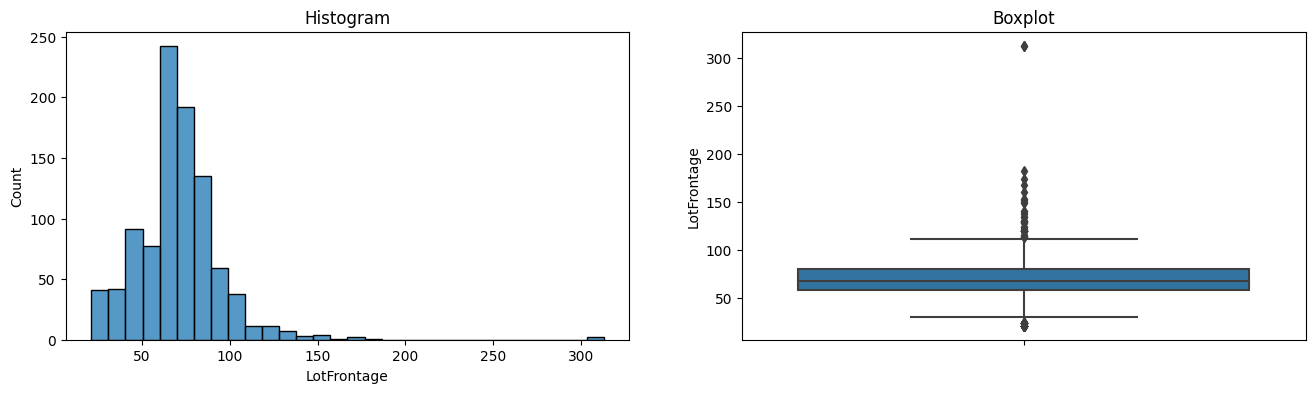


LotFrontage - After Capping


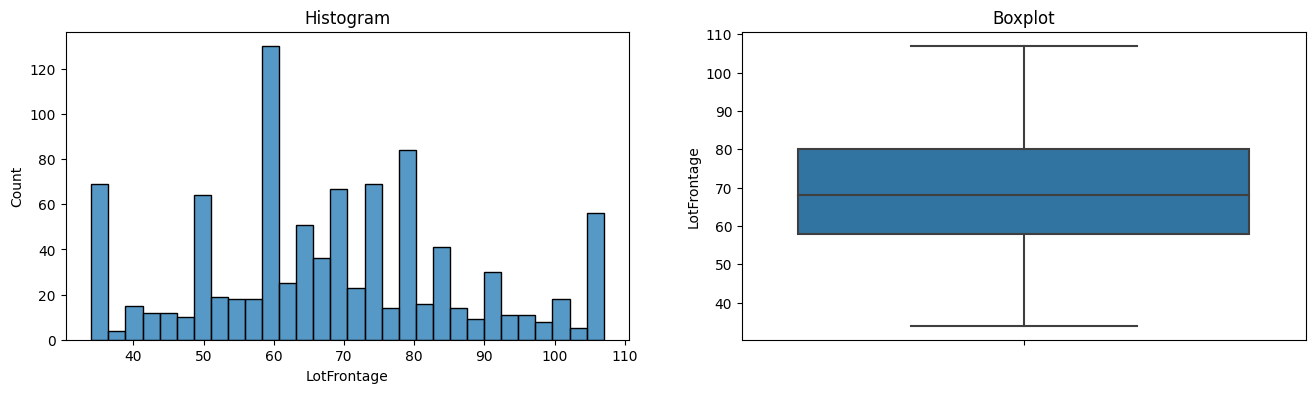

LotArea - Before Capping


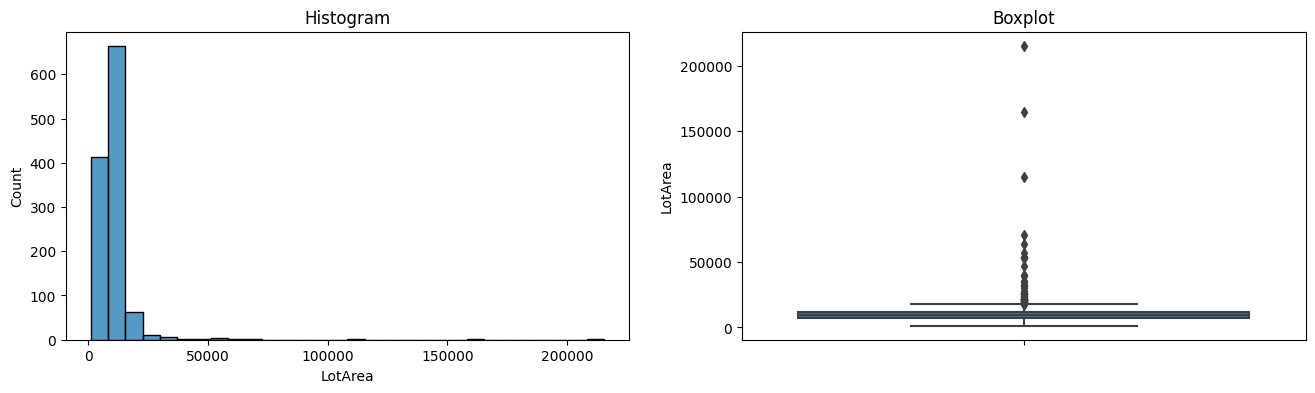


LotArea - After Capping


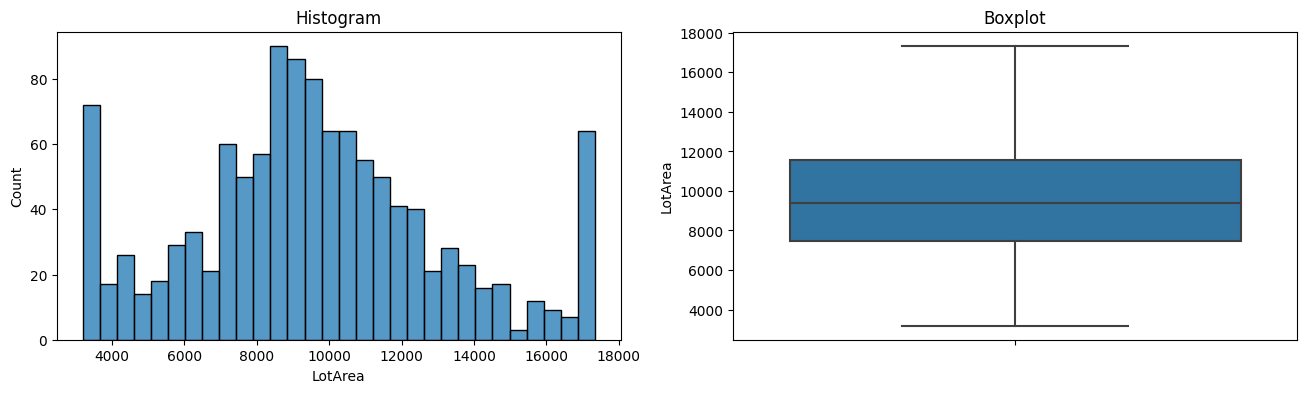

MasVnrArea - Before Capping


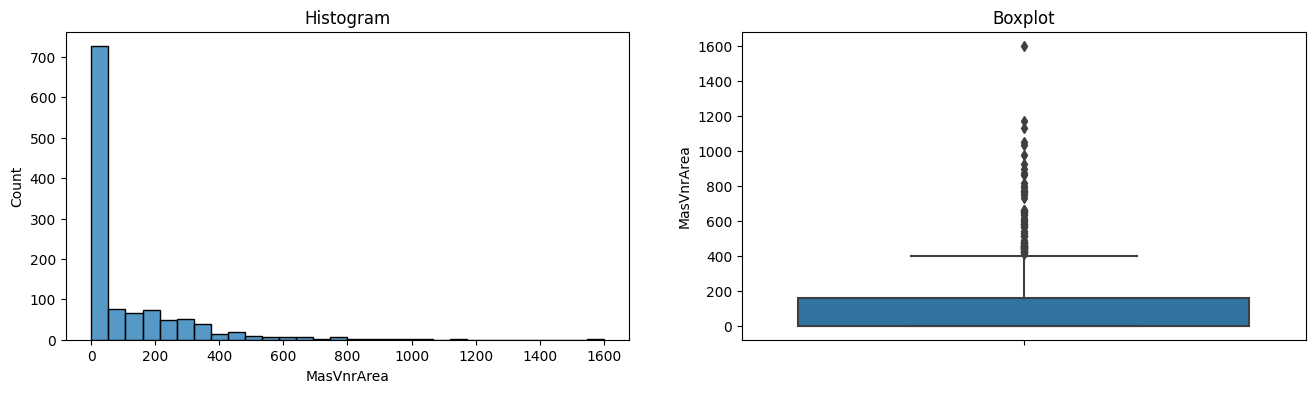


MasVnrArea - After Capping


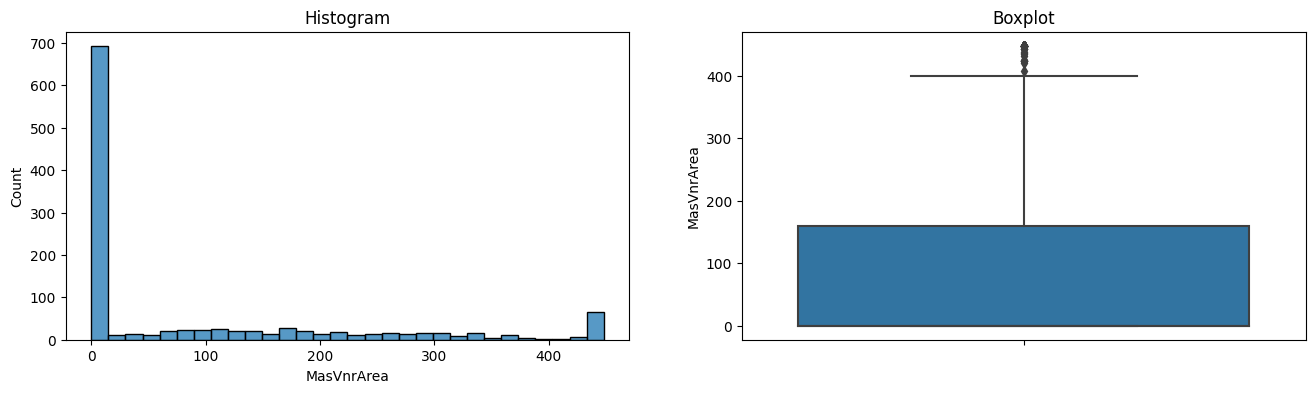

BsmtFinSF1 - Before Capping


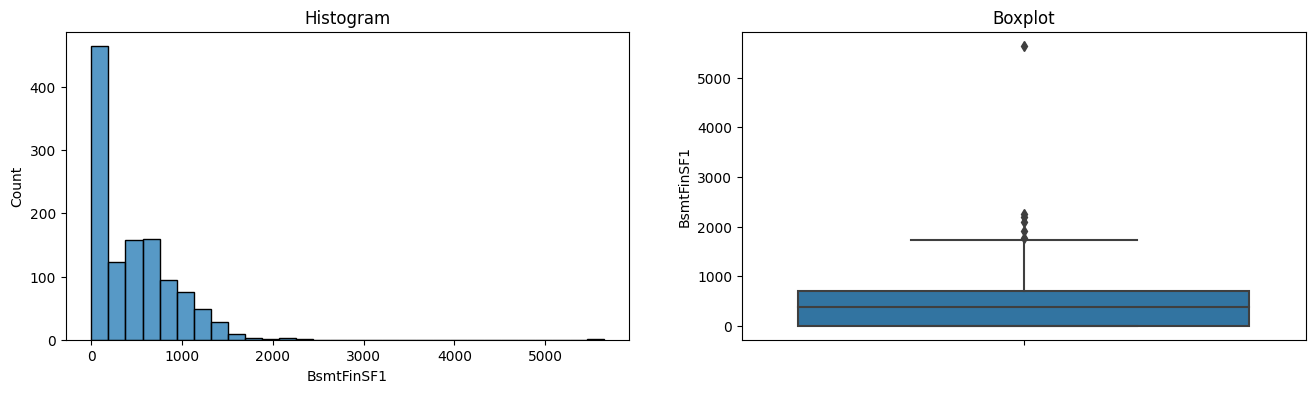


BsmtFinSF1 - After Capping


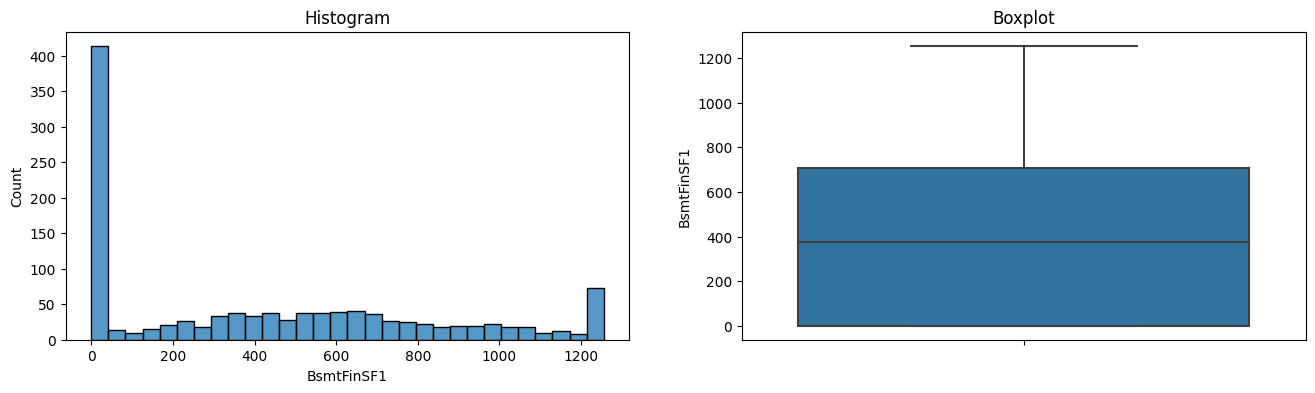

BsmtFinSF2 - Before Capping


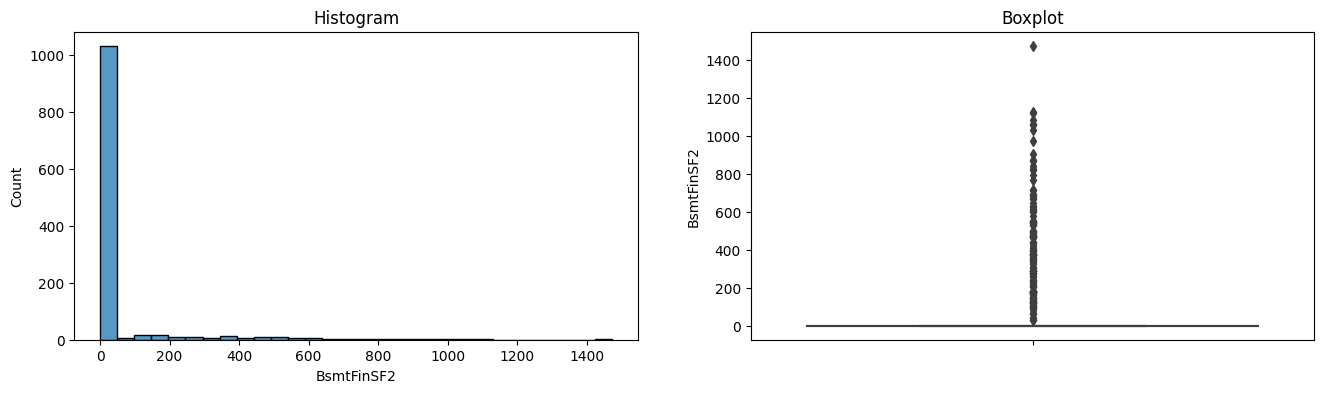


BsmtFinSF2 - After Capping


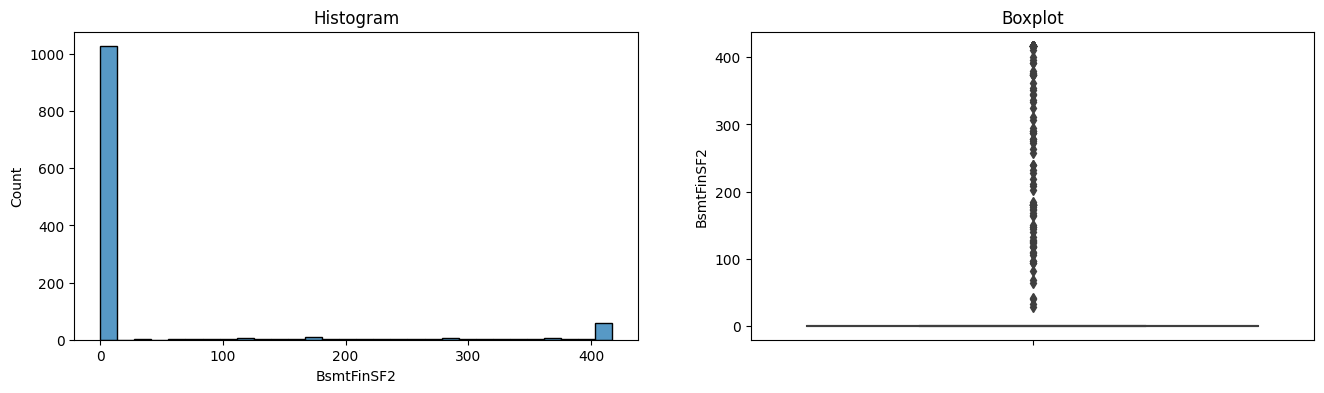

BsmtUnfSF - Before Capping


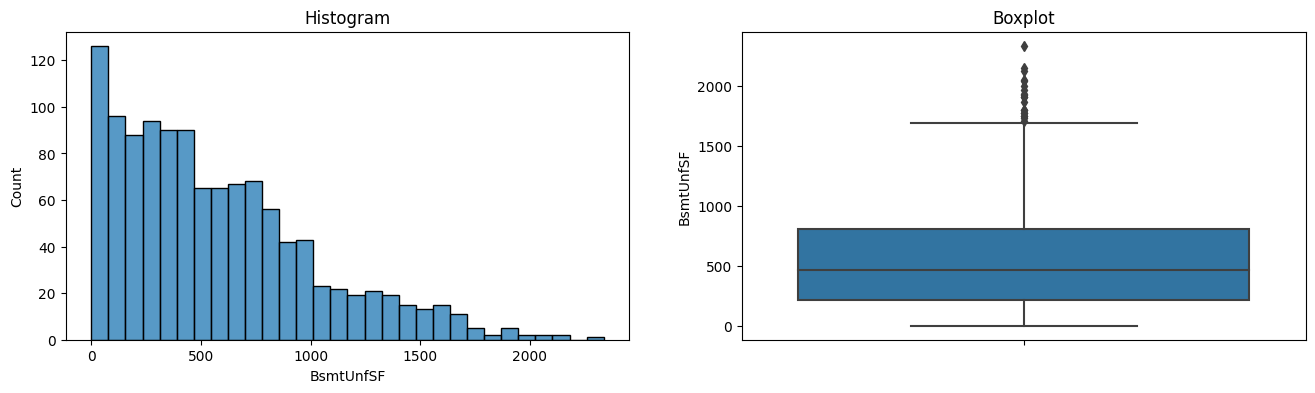


BsmtUnfSF - After Capping


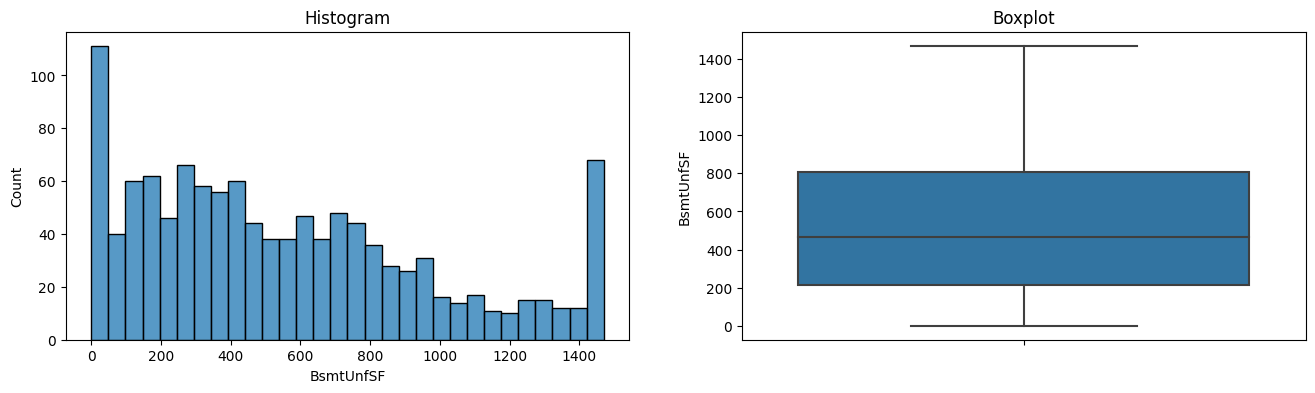

TotalBsmtSF - Before Capping


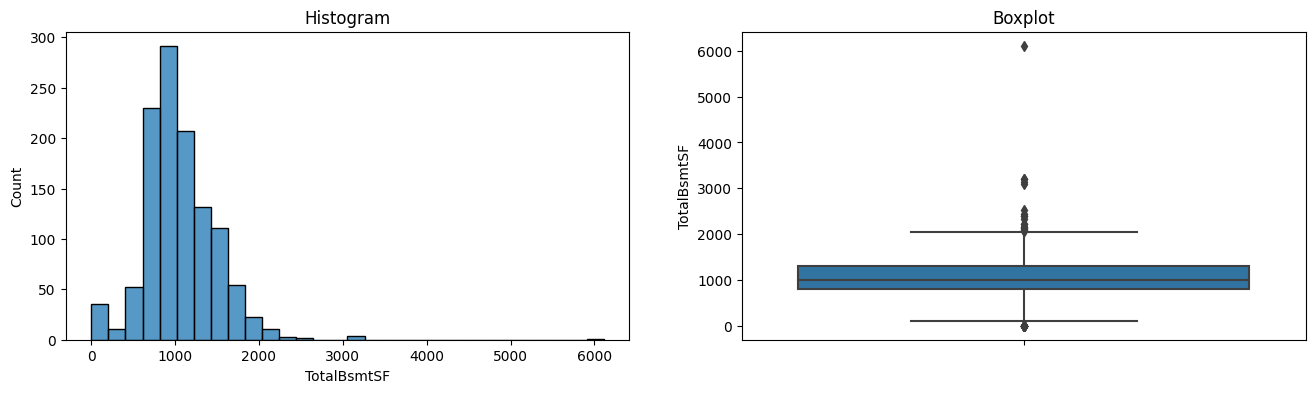


TotalBsmtSF - After Capping


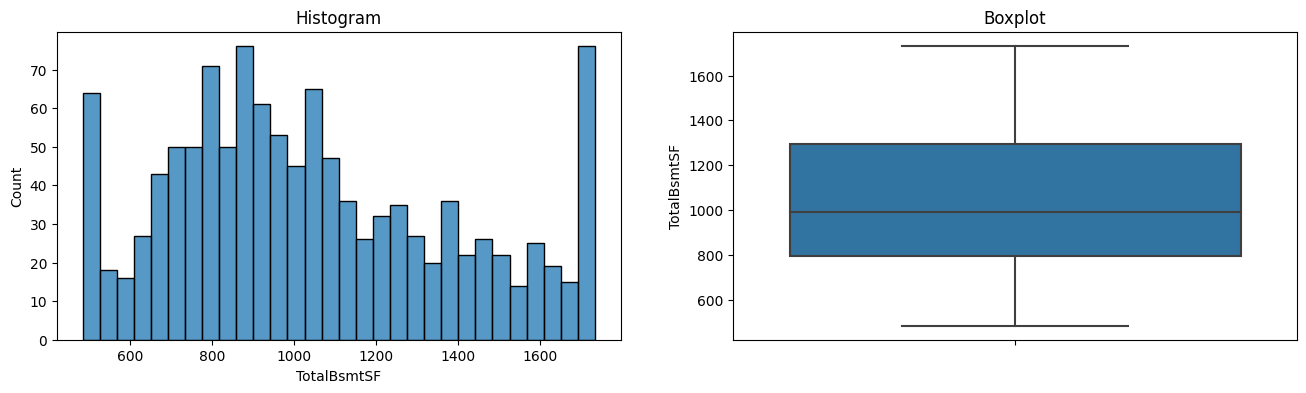

1stFlrSF - Before Capping


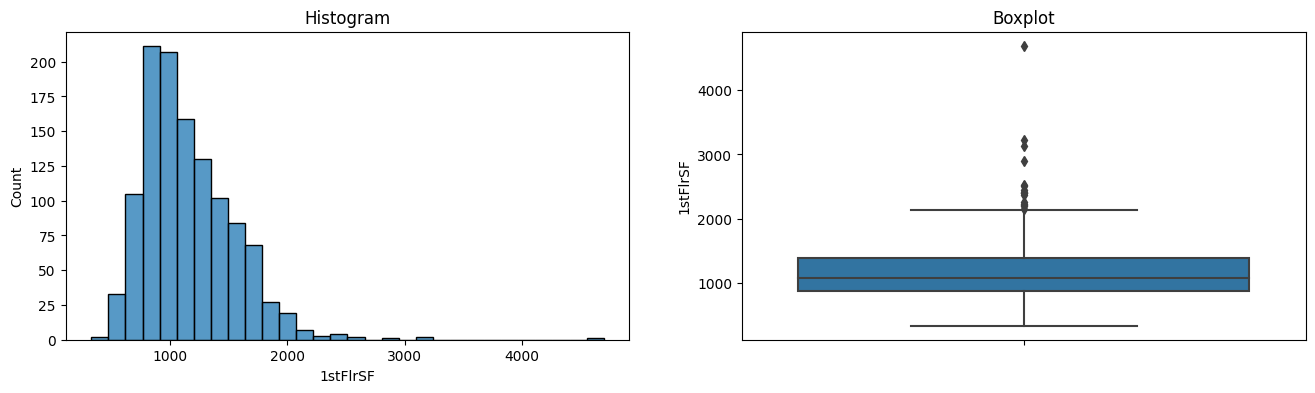


1stFlrSF - After Capping


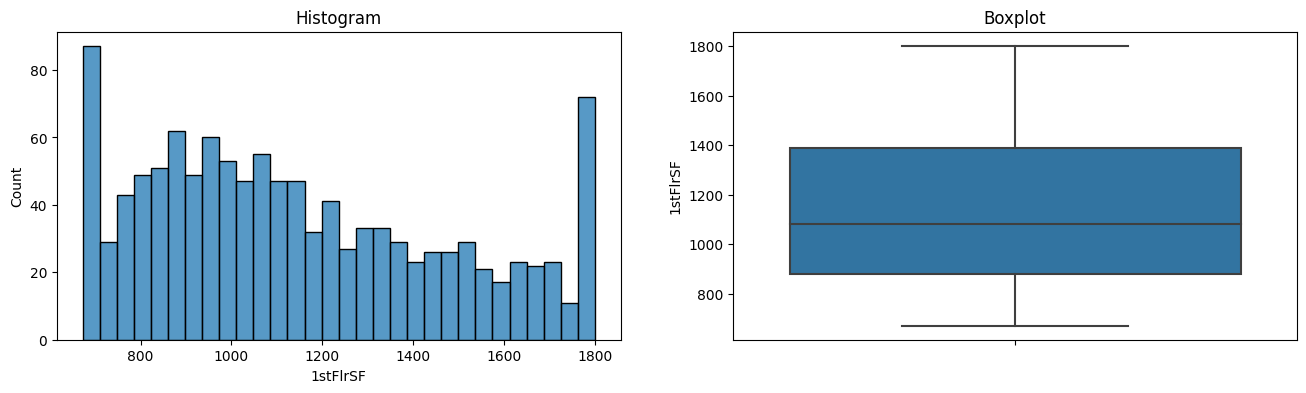

2ndFlrSF - Before Capping


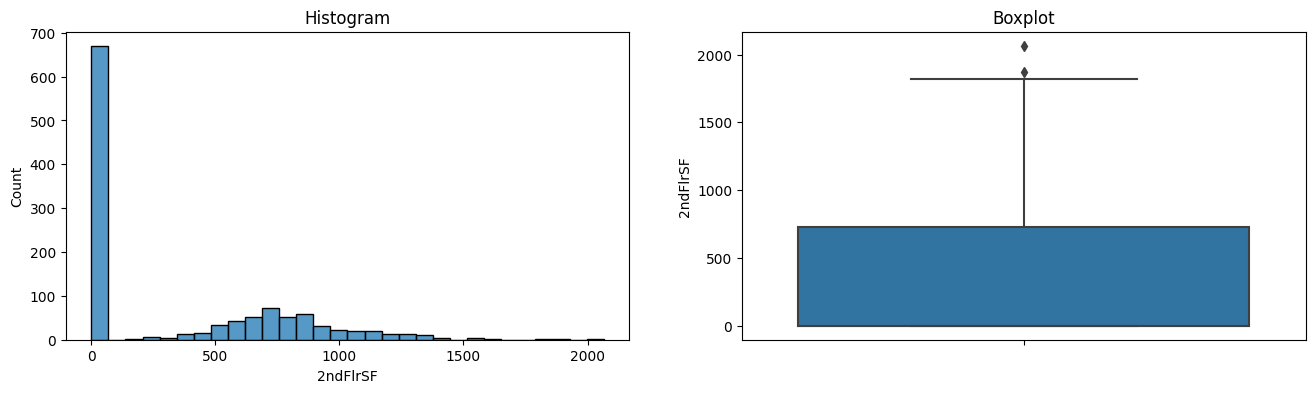


2ndFlrSF - After Capping


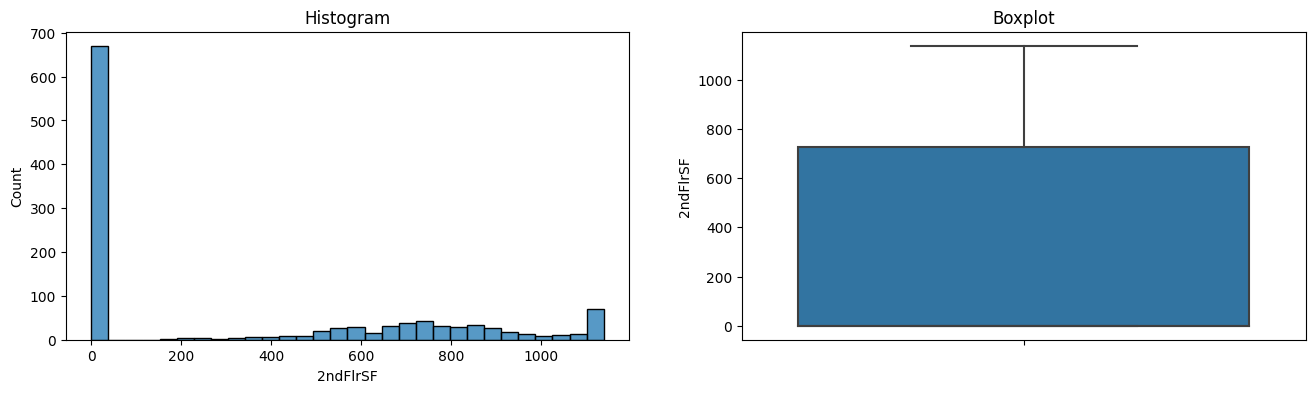

LowQualFinSF - Before Capping


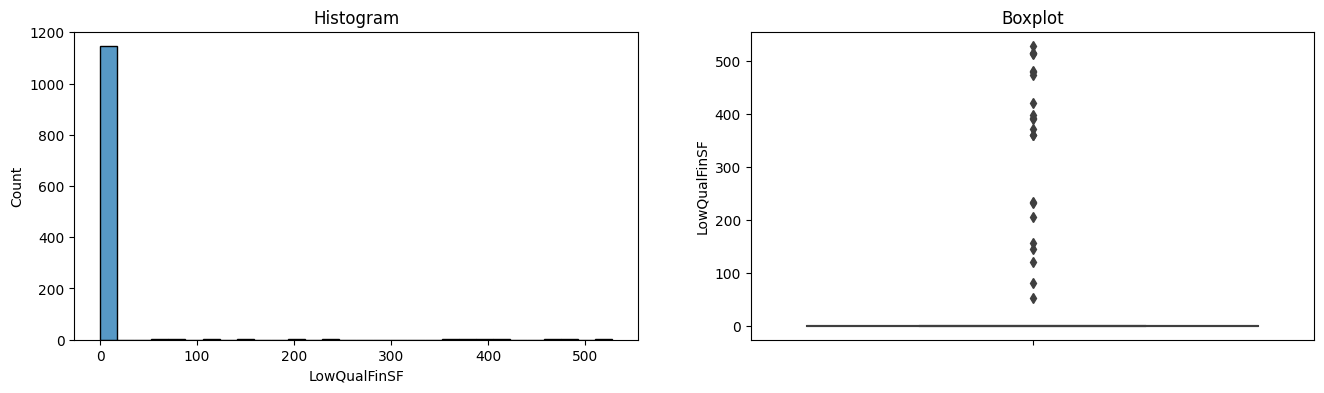


LowQualFinSF - After Capping


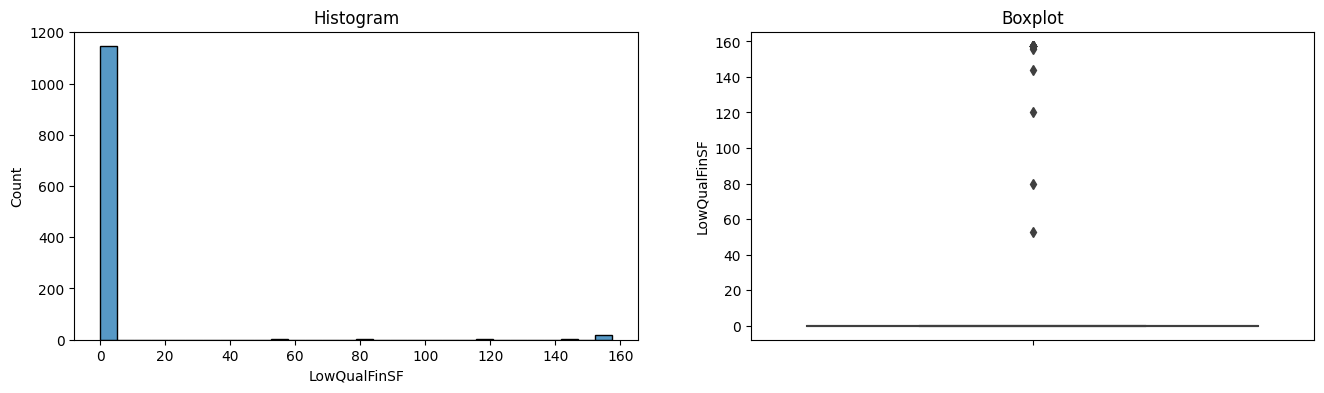

GrLivArea - Before Capping


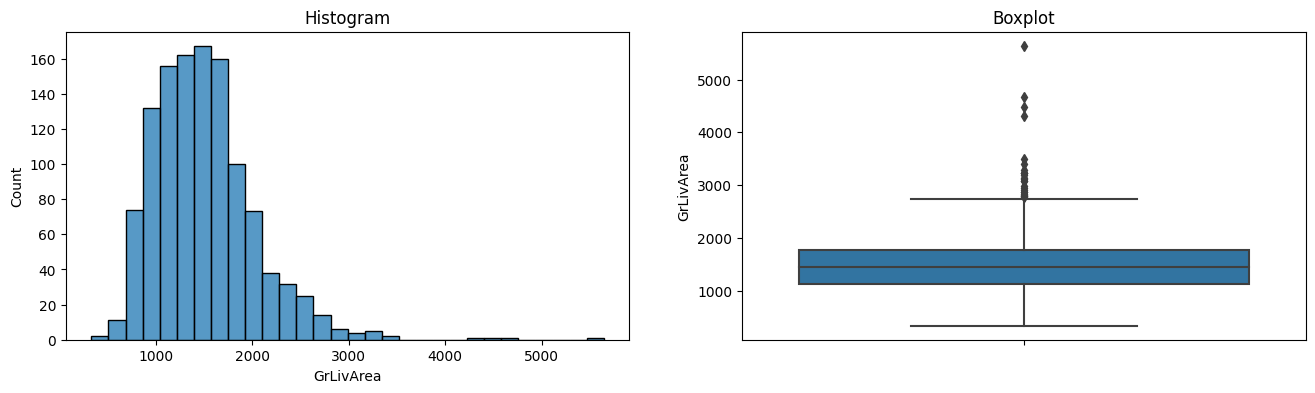


GrLivArea - After Capping


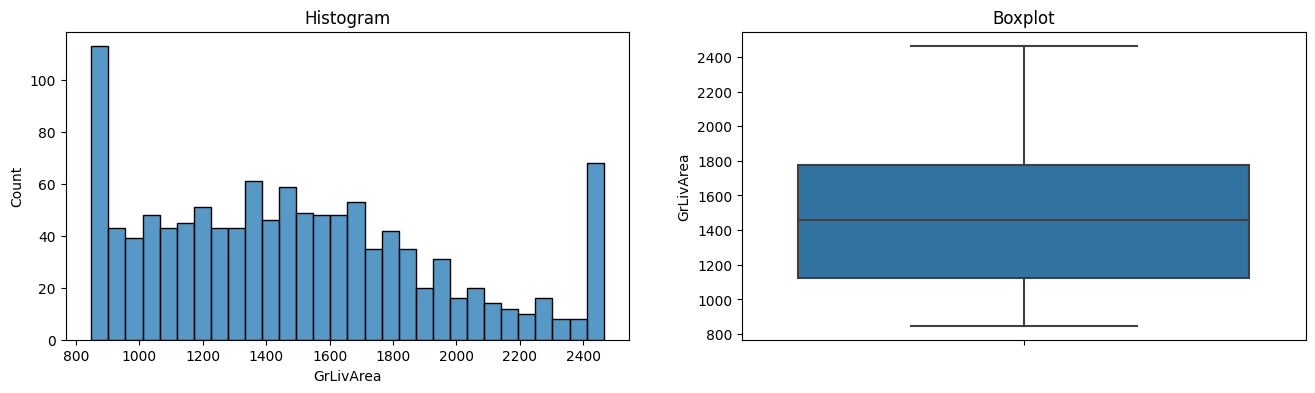

GarageArea - Before Capping


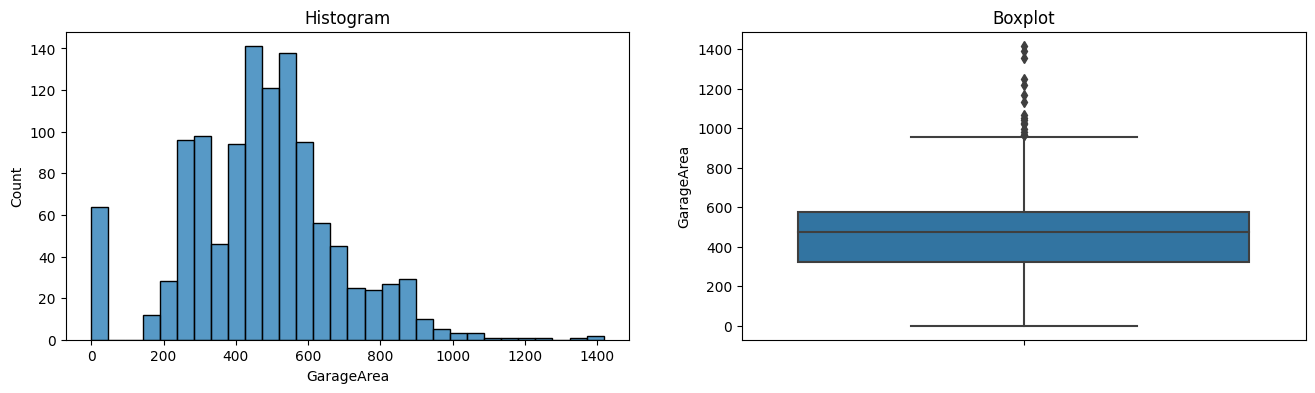


GarageArea - After Capping


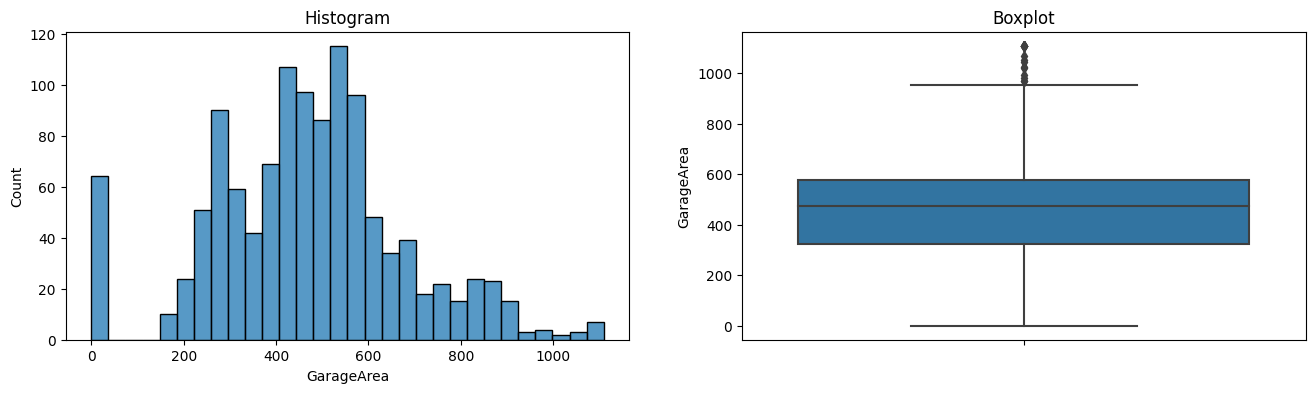

WoodDeckSF - Before Capping


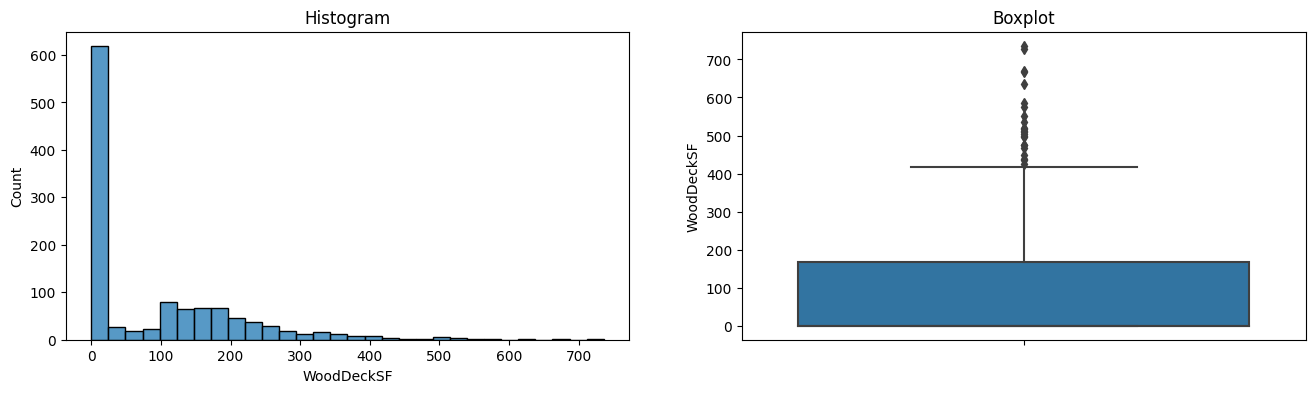


WoodDeckSF - After Capping


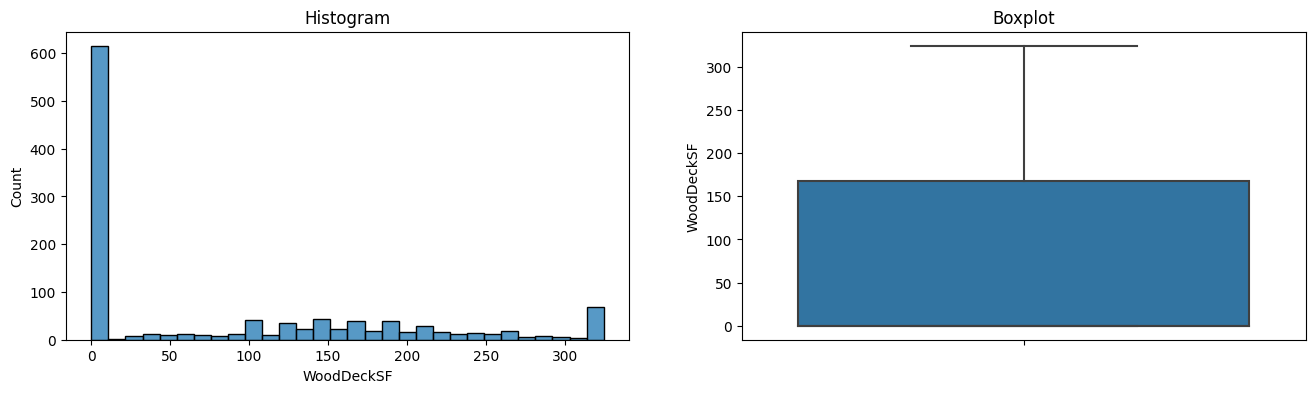

OpenPorchSF - Before Capping


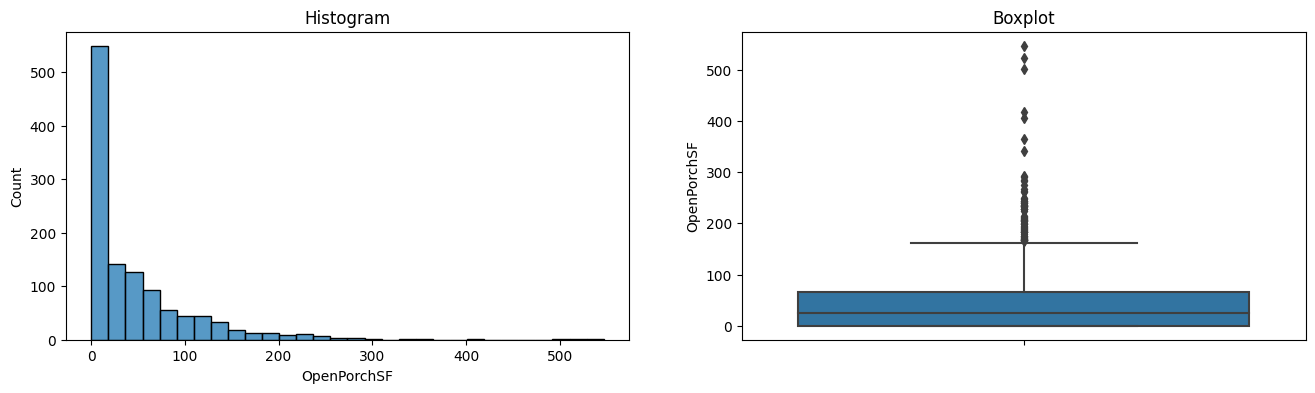


OpenPorchSF - After Capping


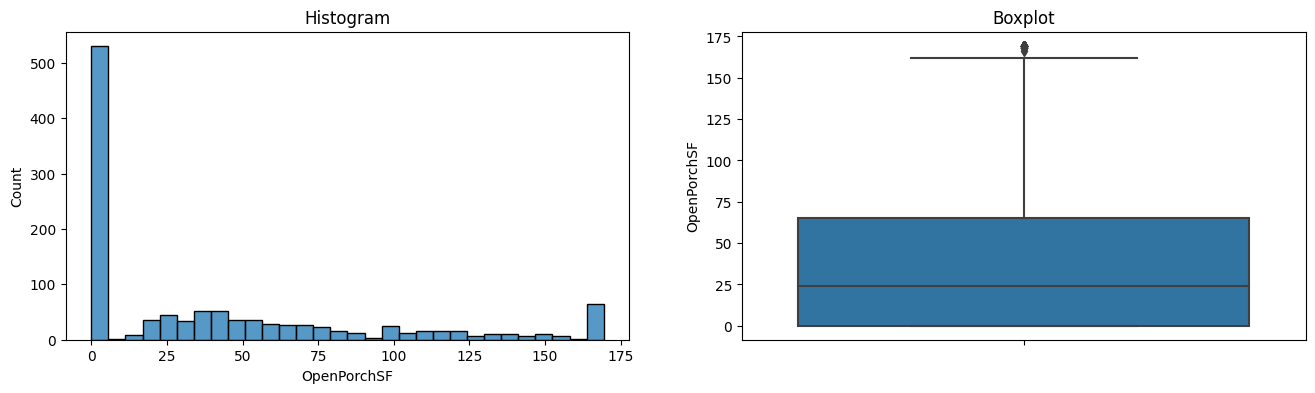

EnclosedPorch - Before Capping


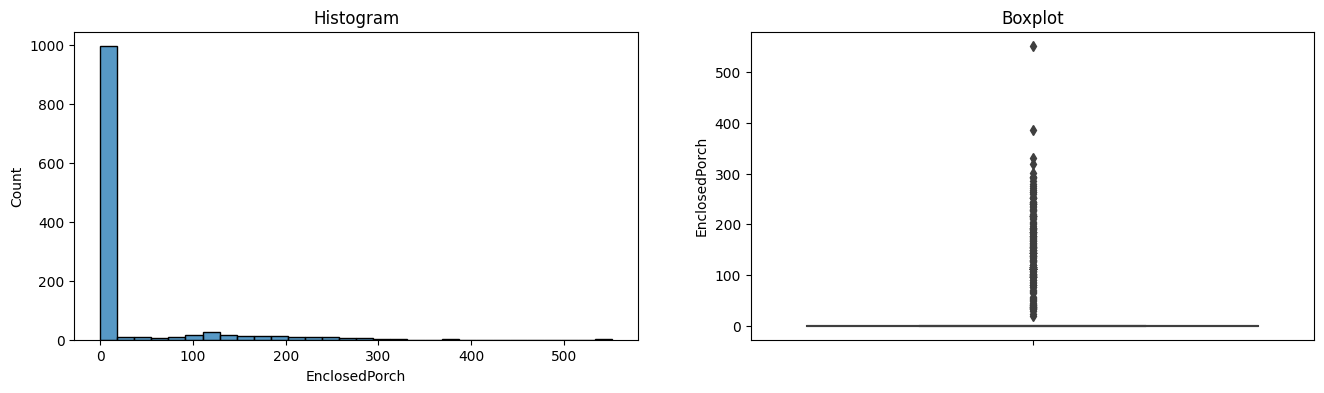


EnclosedPorch - After Capping


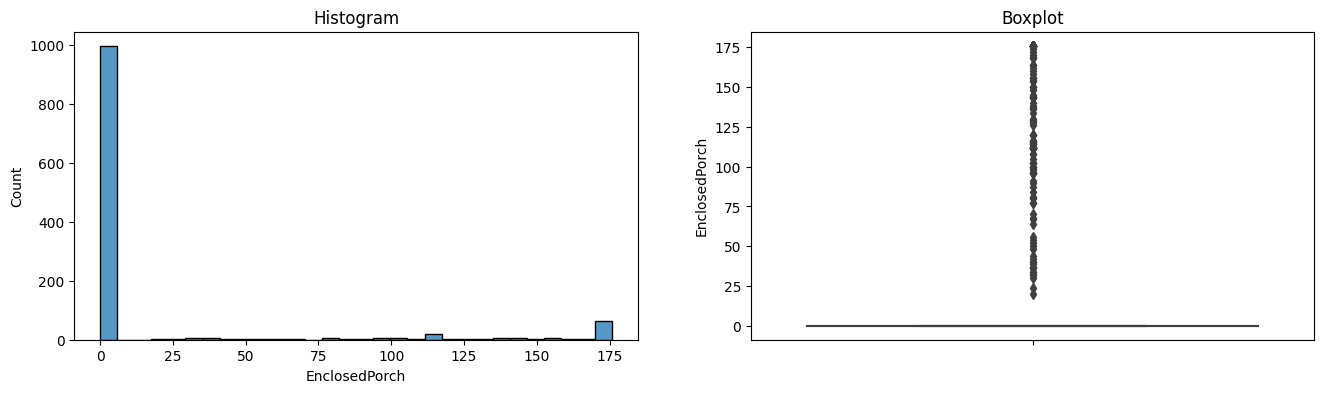

3SsnPorch - Before Capping


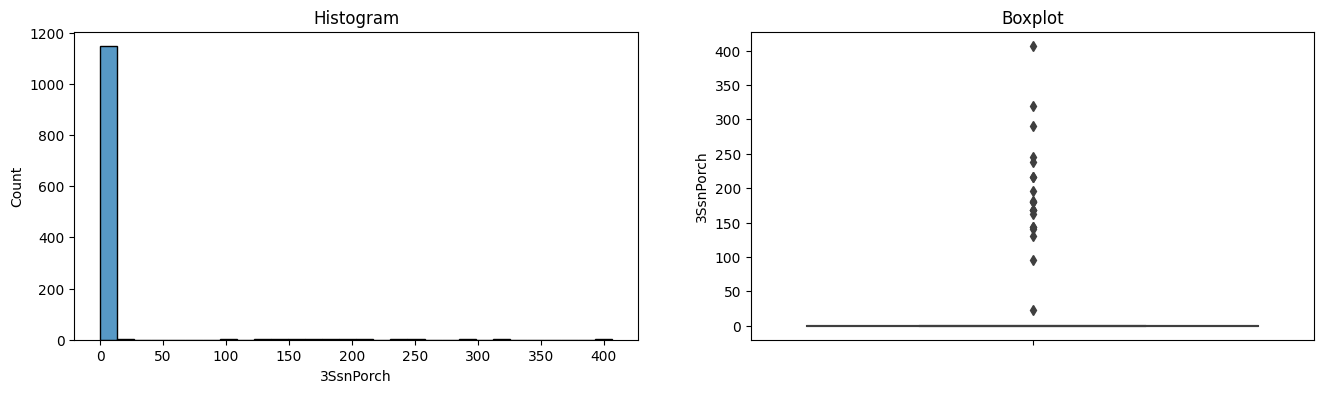


3SsnPorch - After Capping


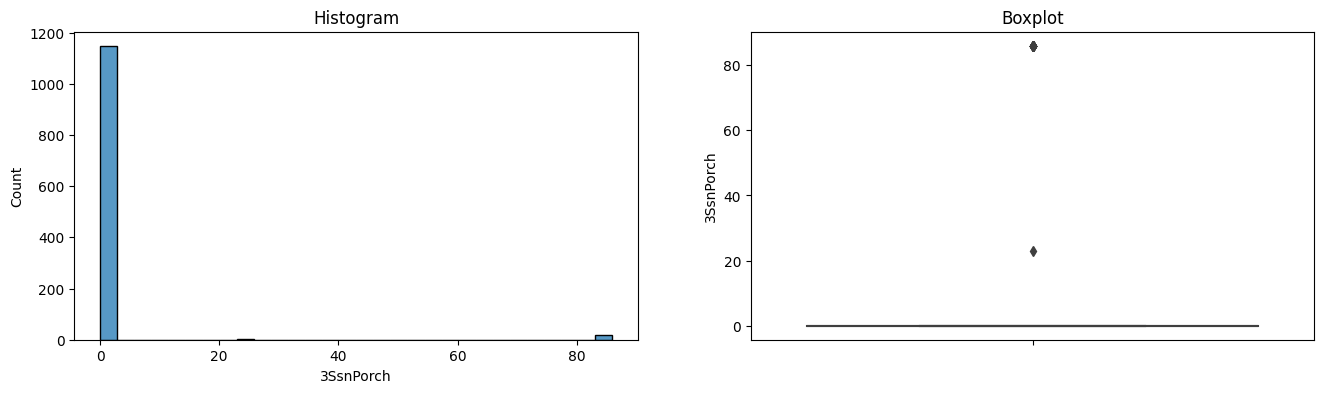

ScreenPorch - Before Capping


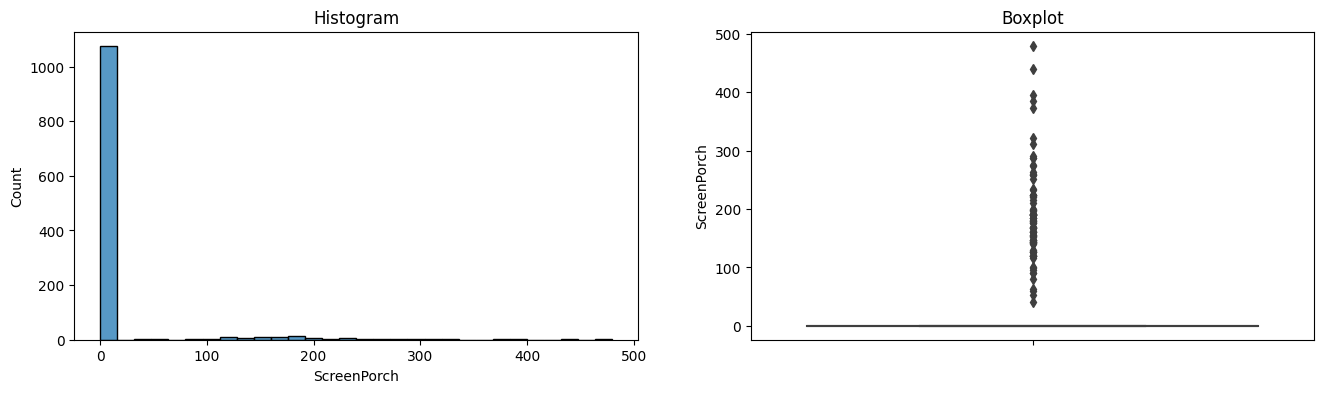


ScreenPorch - After Capping


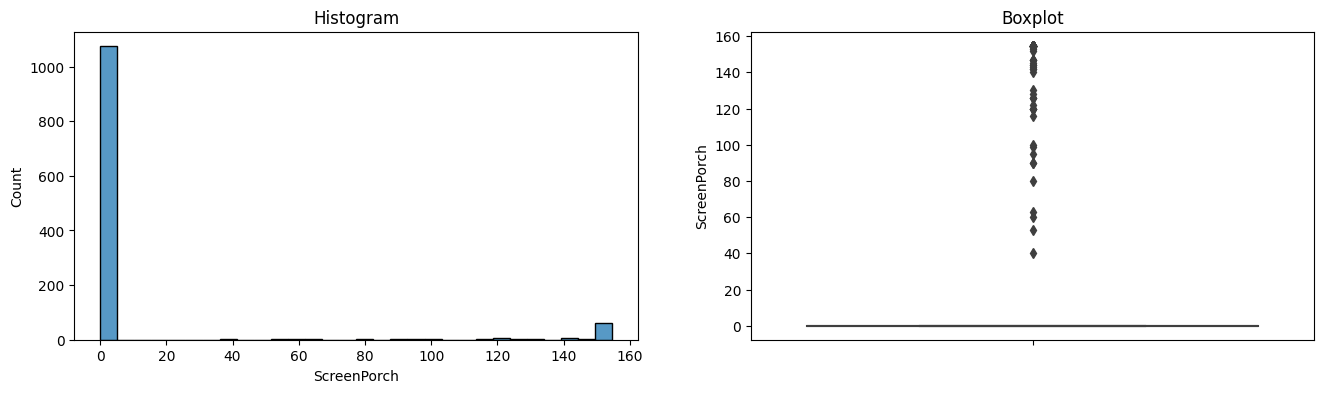

PoolArea - Before Capping


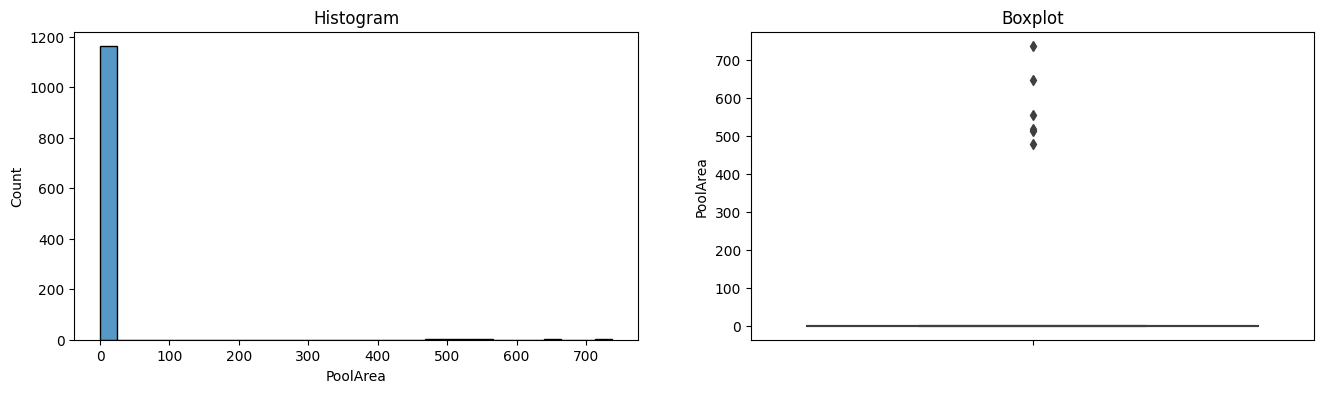


PoolArea - After Capping


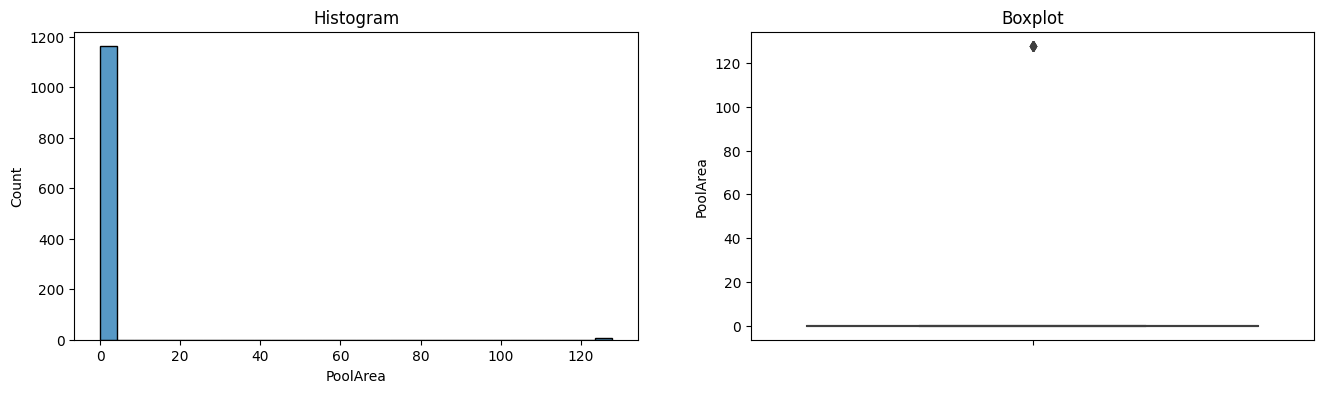

MiscVal - Before Capping


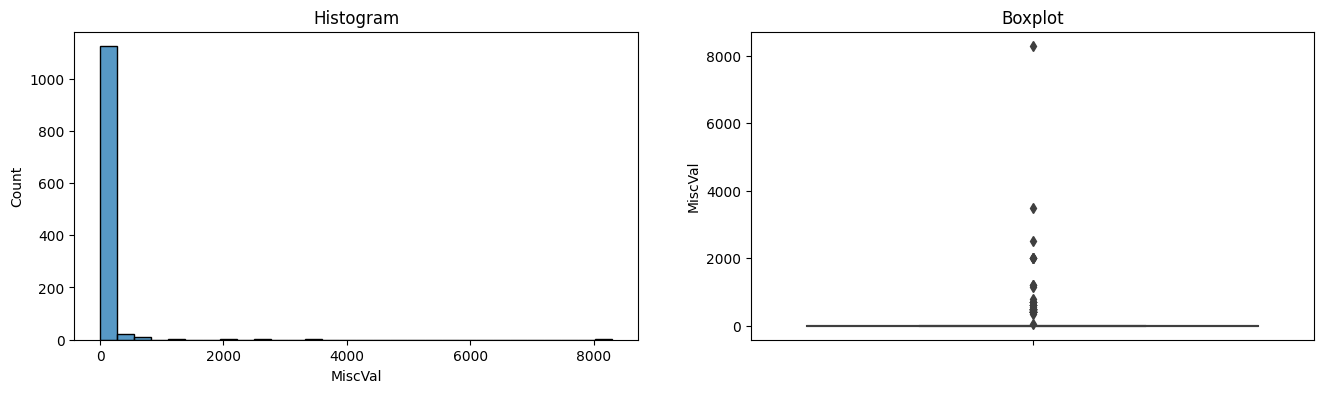


MiscVal - After Capping


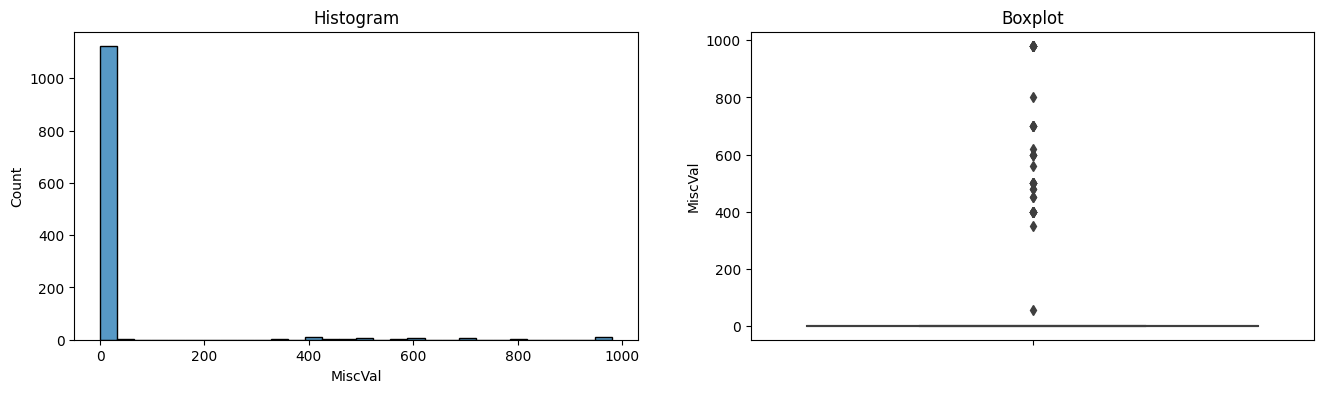

MSSubClass - Before Capping


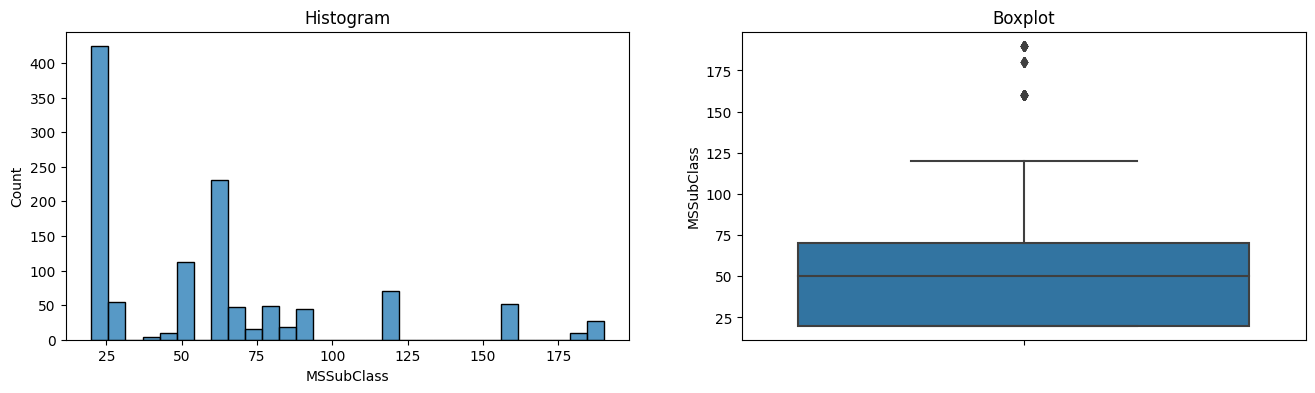


MSSubClass - After Capping


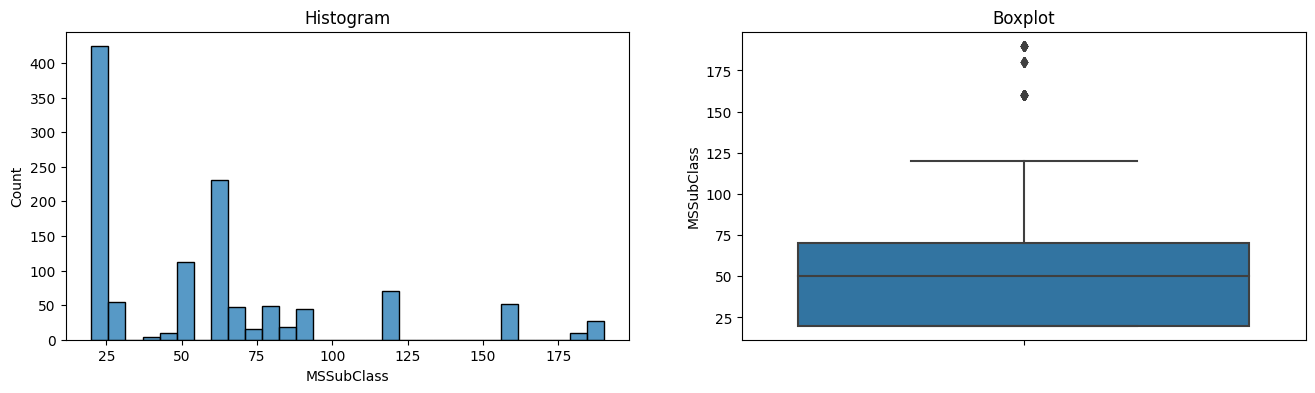

OverallQual - Before Capping


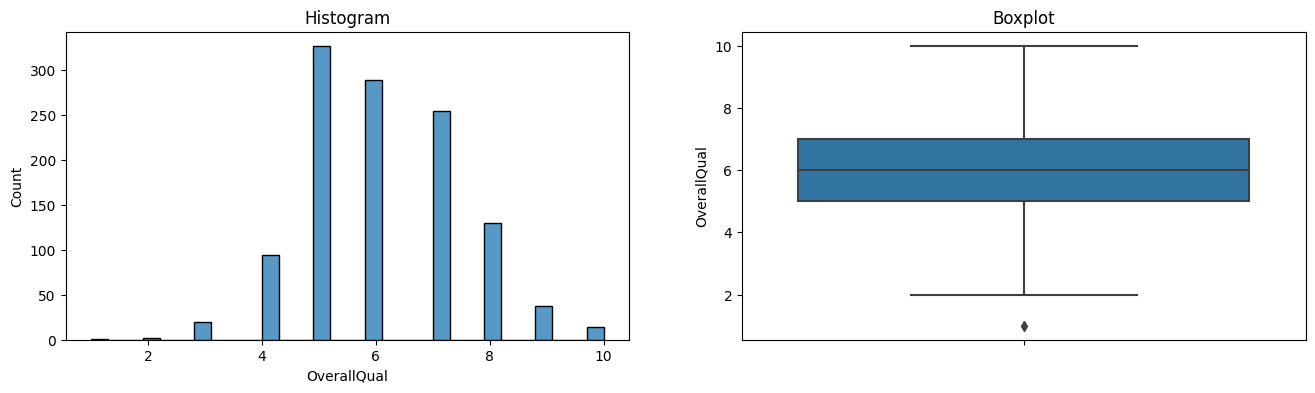


OverallQual - After Capping


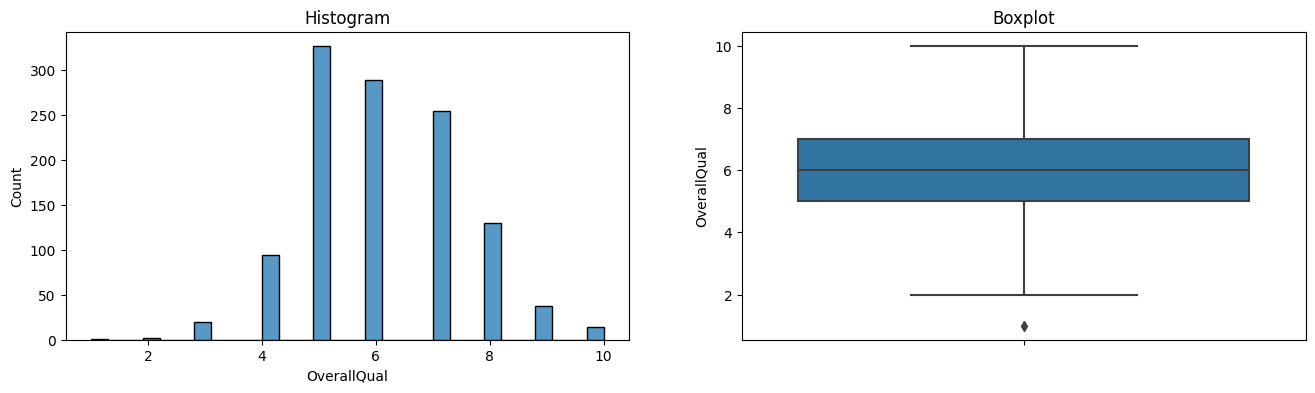

OverallCond - Before Capping


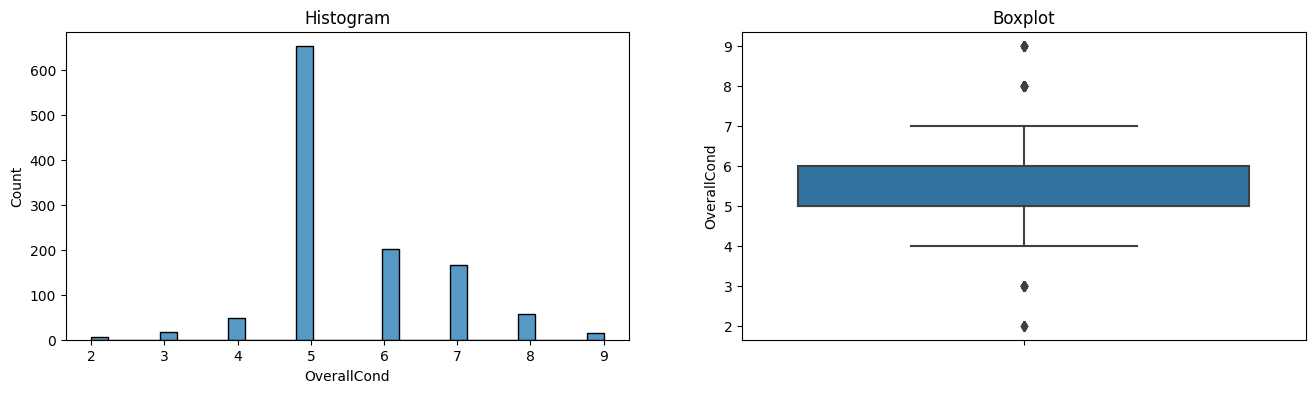


OverallCond - After Capping


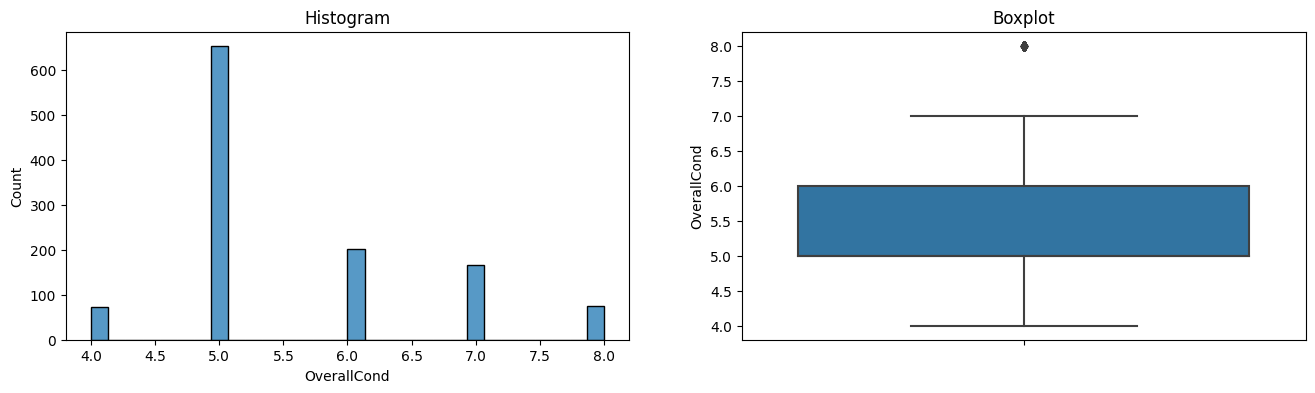

YearBuilt - Before Capping


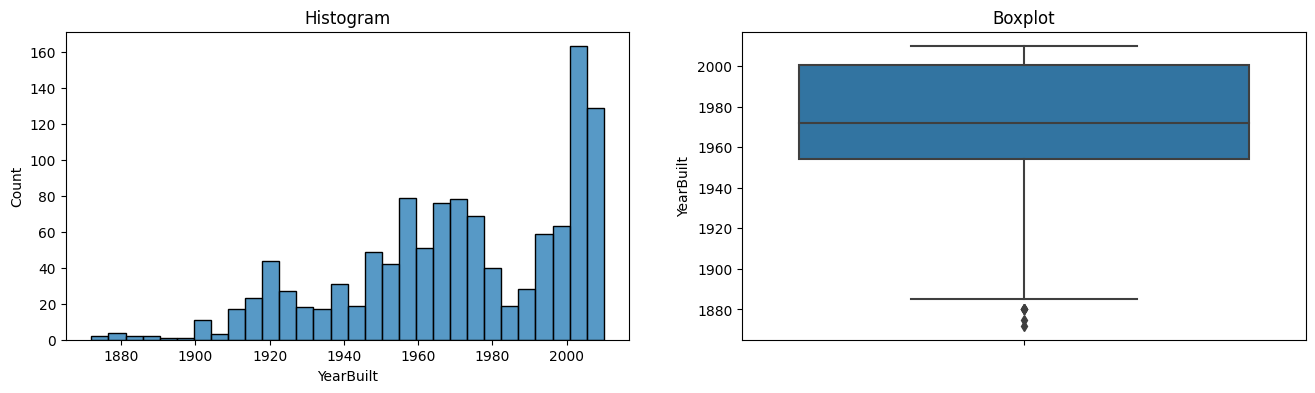


YearBuilt - After Capping


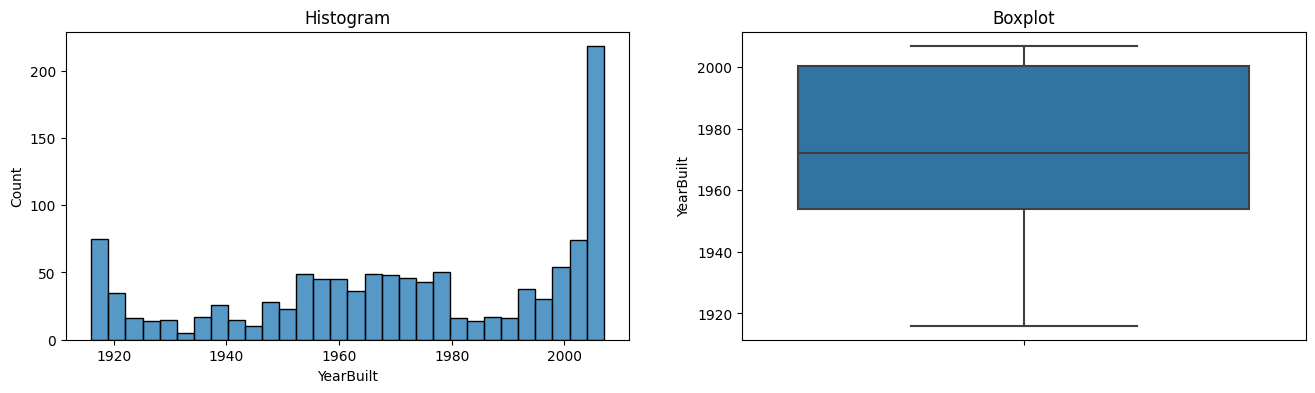

YearRemodAdd - Before Capping


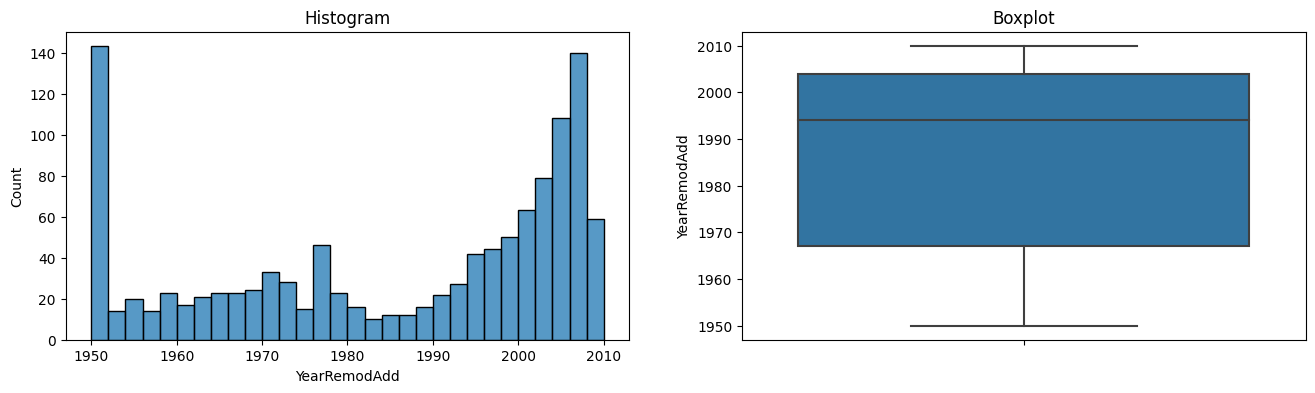


YearRemodAdd - After Capping


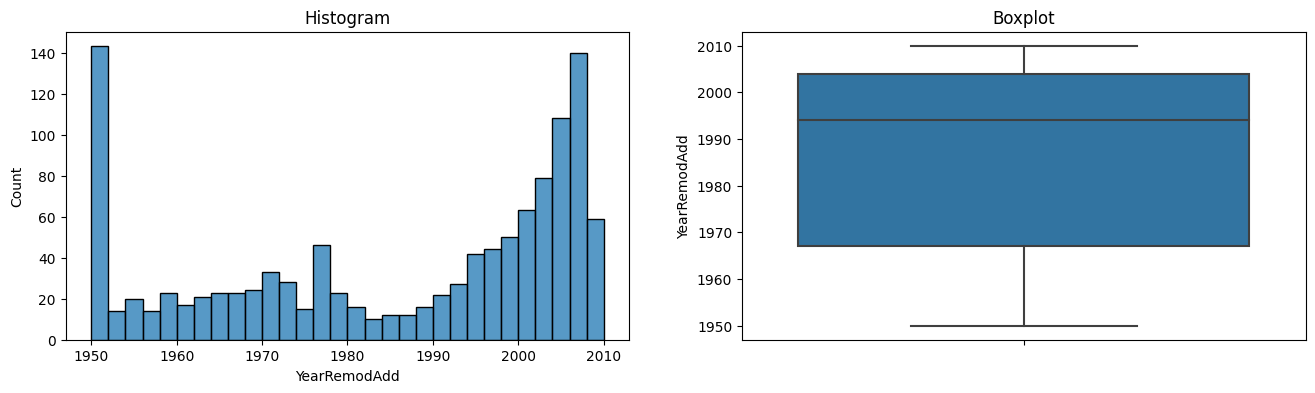

BsmtFullBath - Before Capping


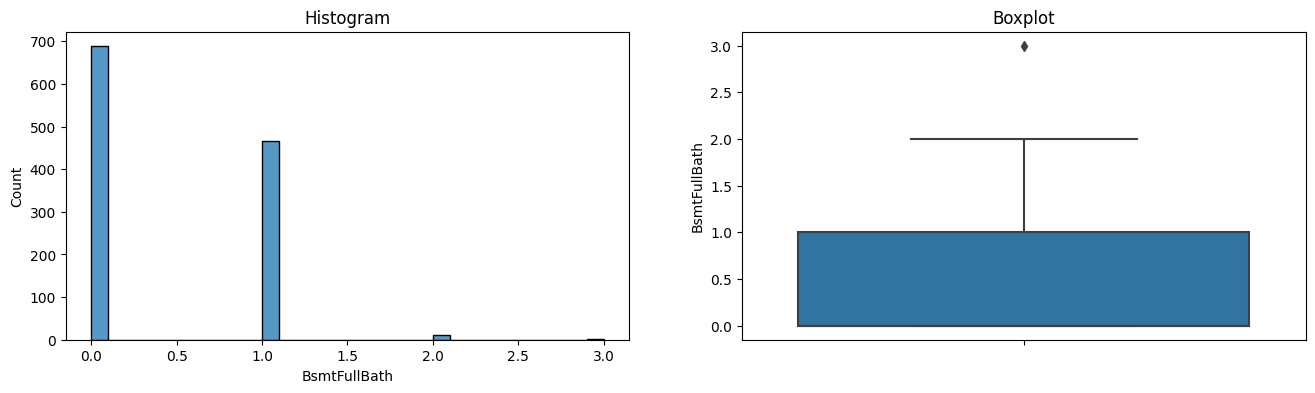


BsmtFullBath - After Capping


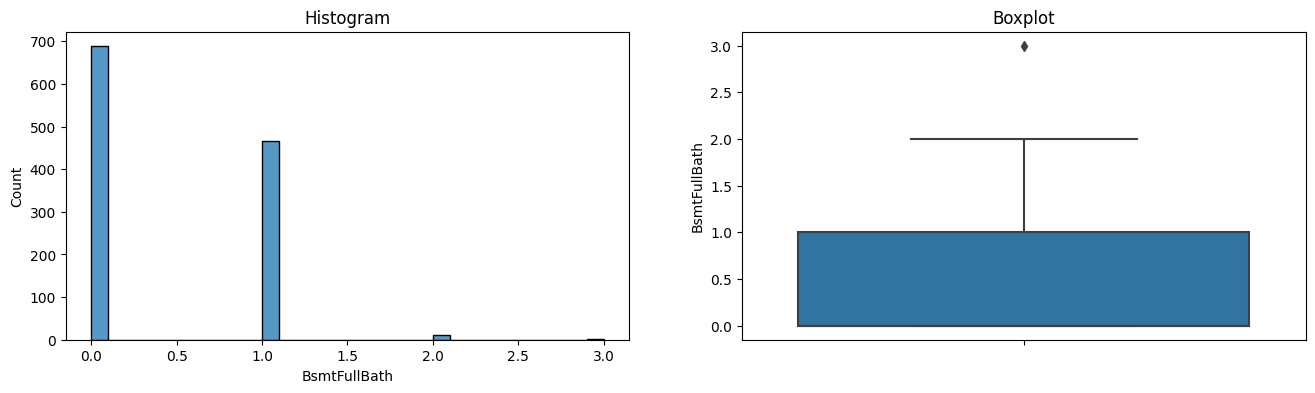

BsmtHalfBath - Before Capping


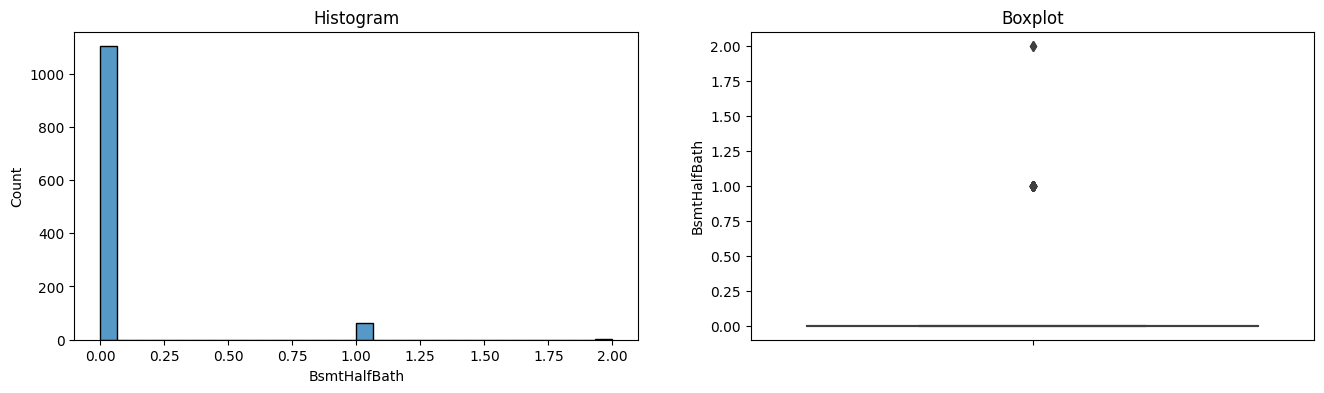


BsmtHalfBath - After Capping


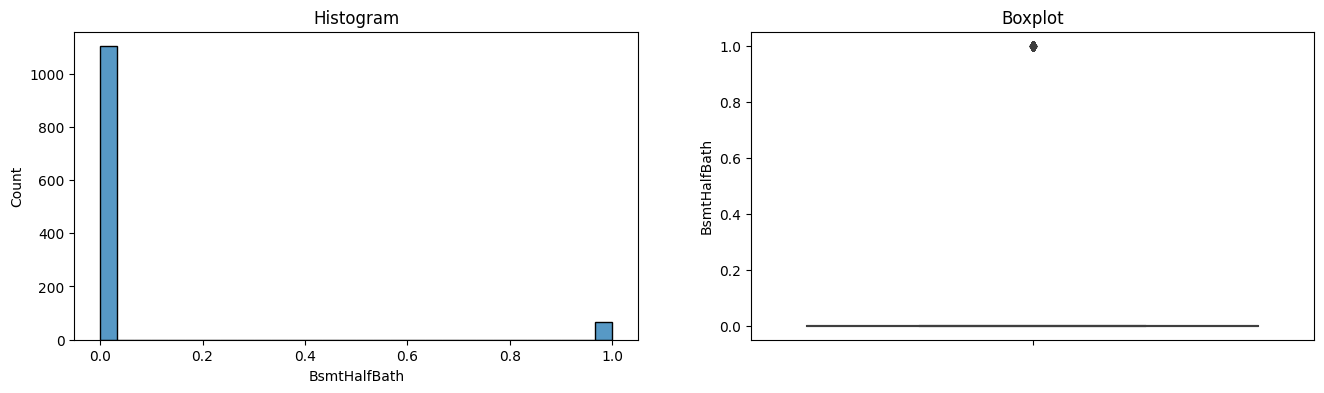

FullBath - Before Capping


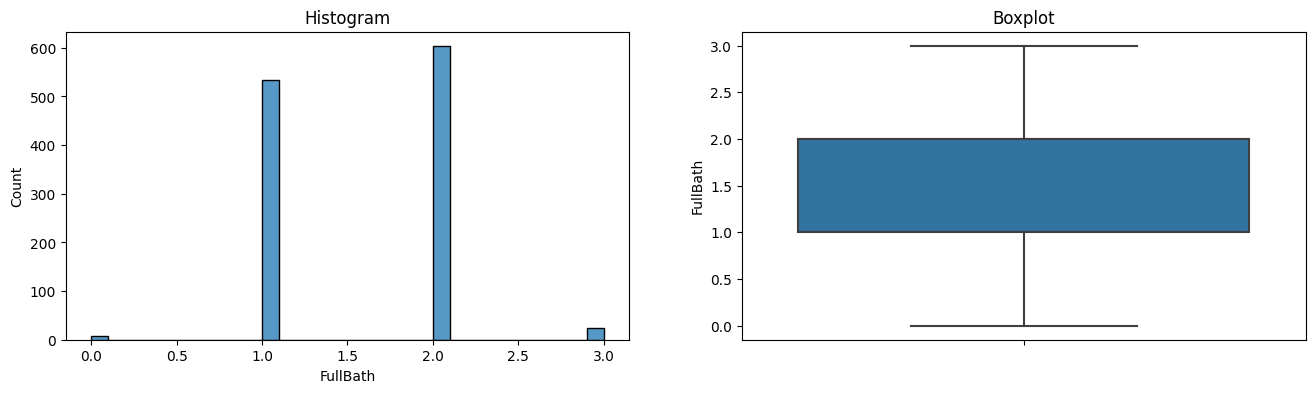


FullBath - After Capping


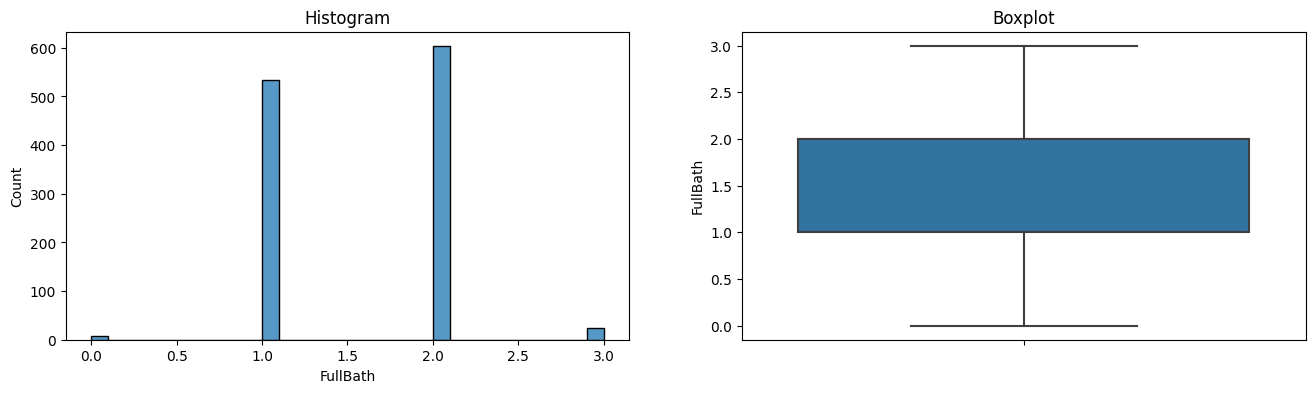

HalfBath - Before Capping


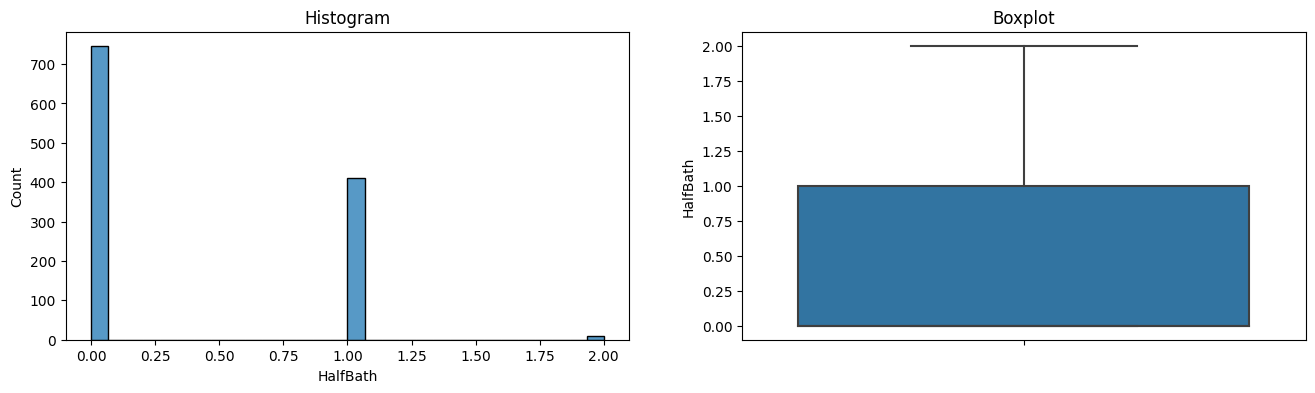


HalfBath - After Capping


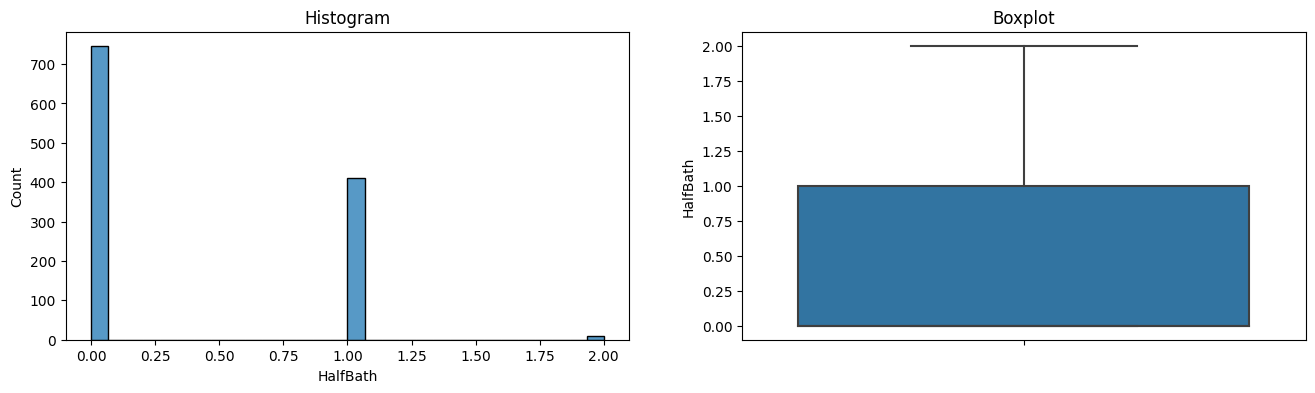

BedroomAbvGr - Before Capping


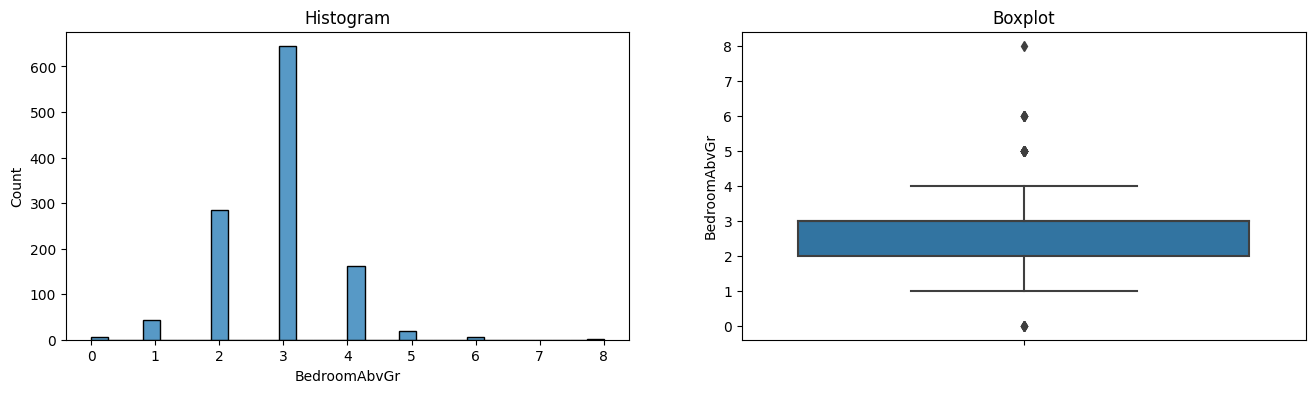


BedroomAbvGr - After Capping


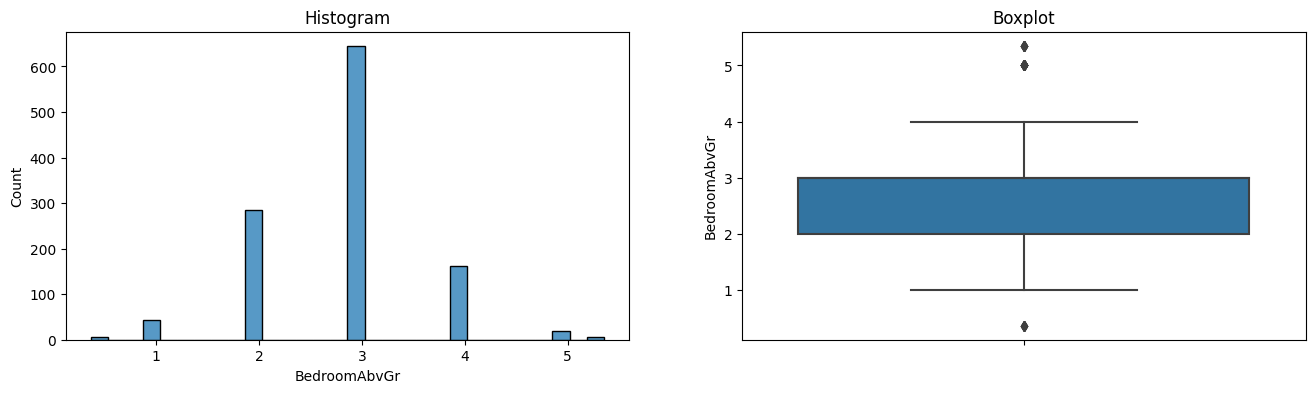

KitchenAbvGr - Before Capping


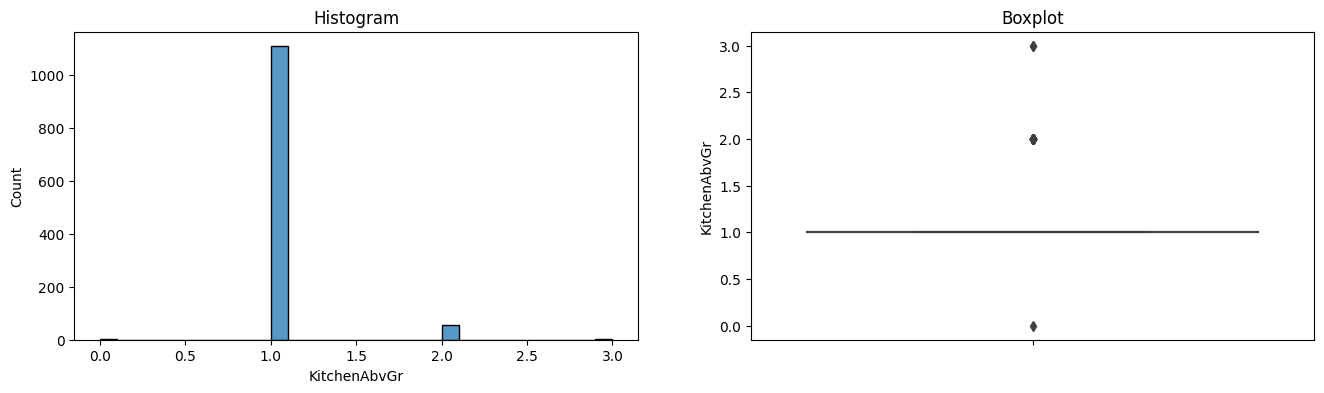


KitchenAbvGr - After Capping


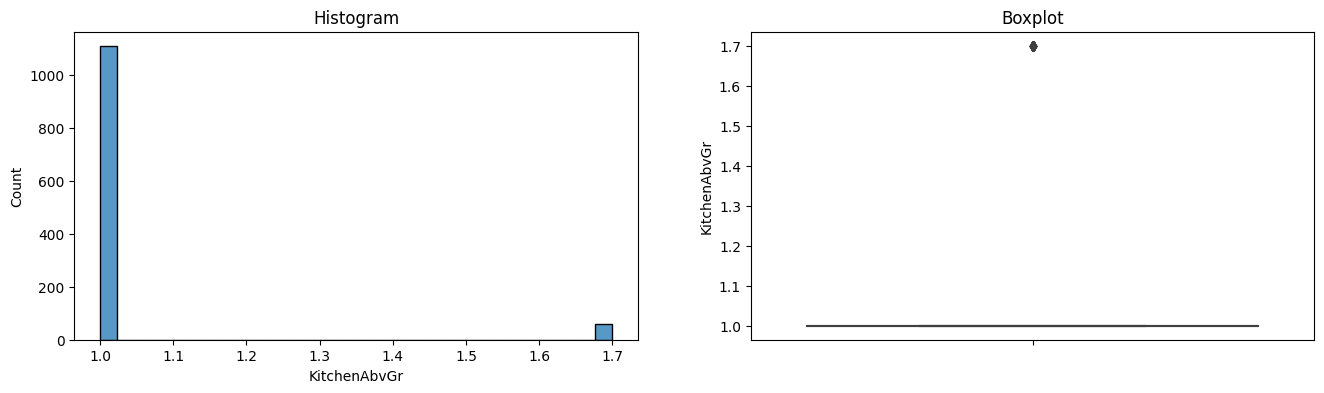

TotRmsAbvGrd - Before Capping


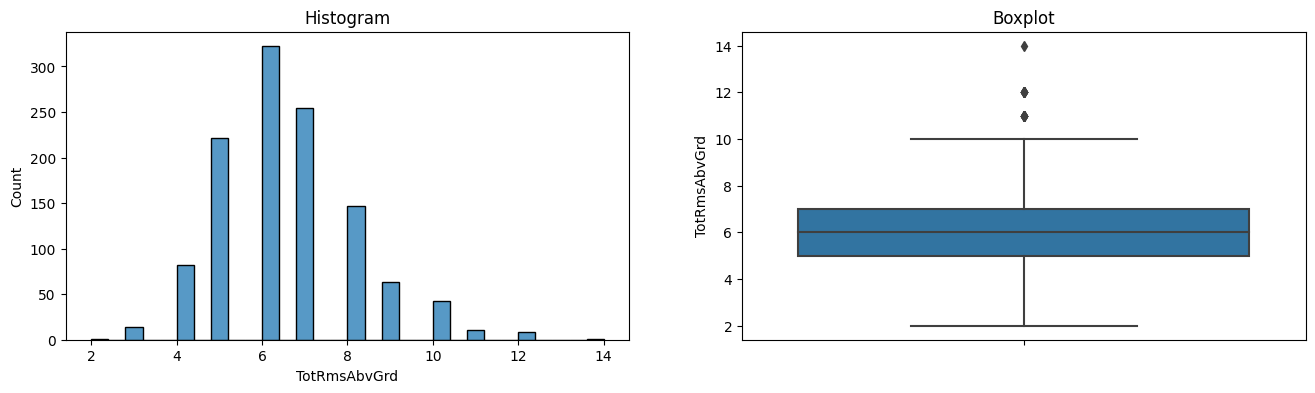


TotRmsAbvGrd - After Capping


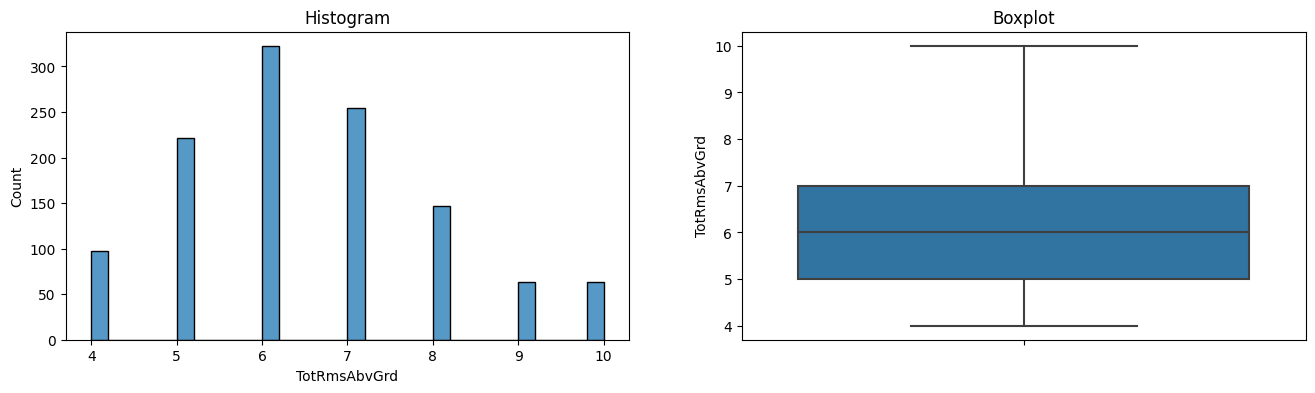

Fireplaces - Before Capping


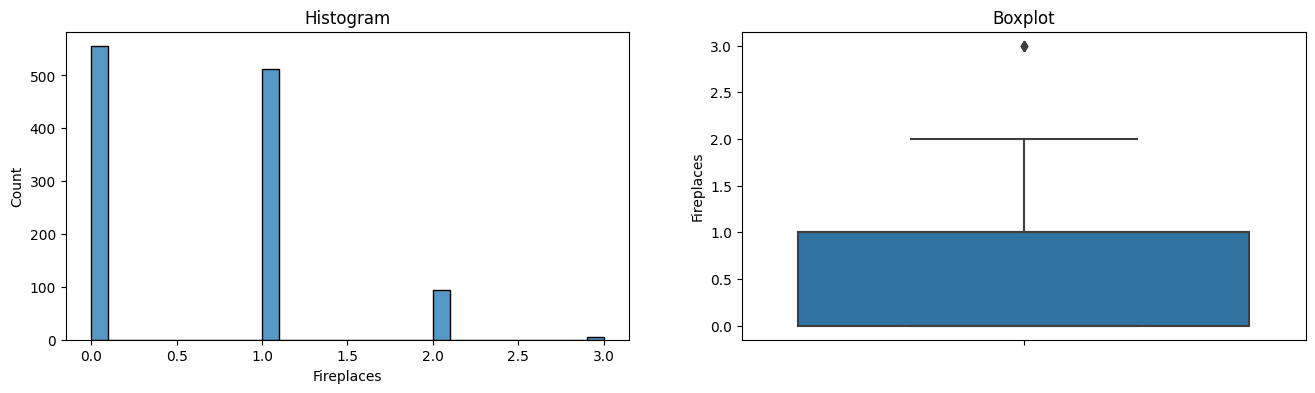


Fireplaces - After Capping


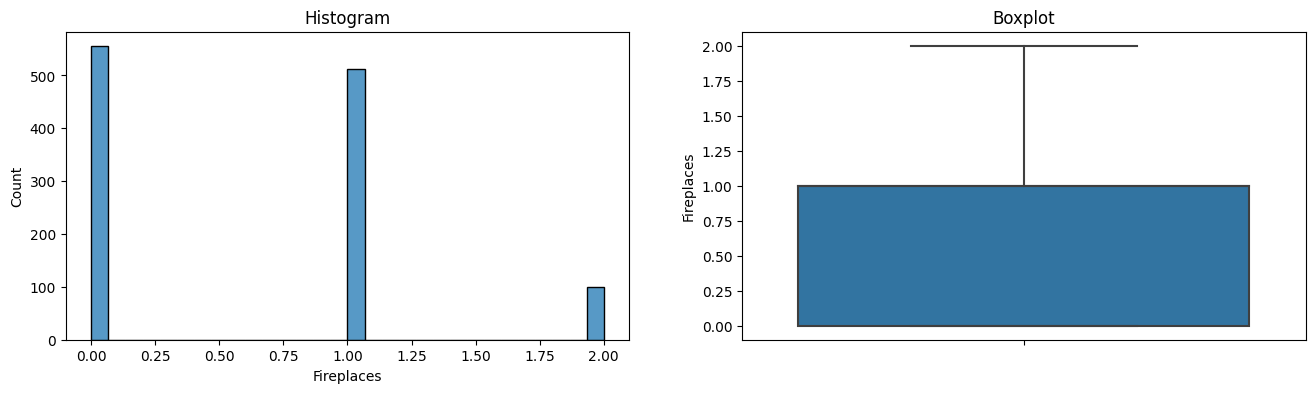

GarageYrBlt - Before Capping


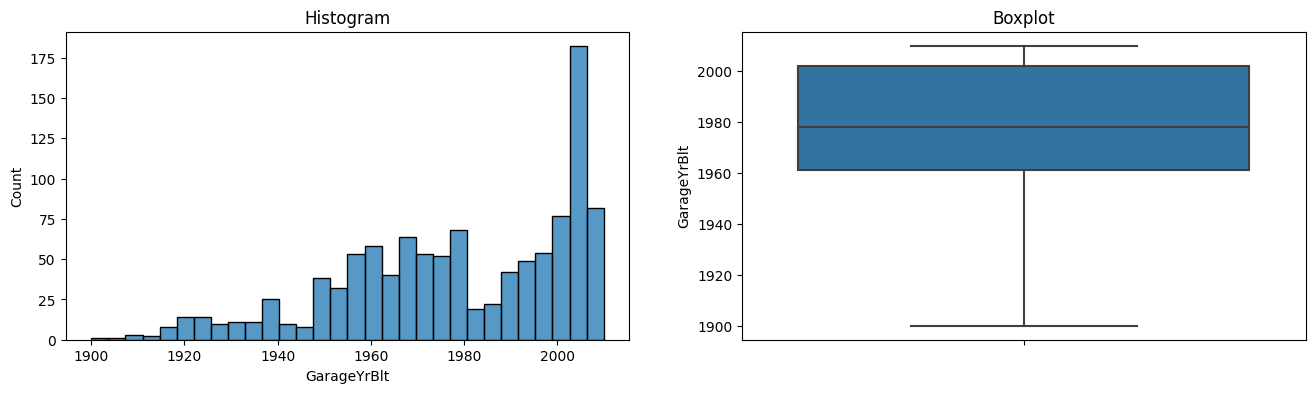


GarageYrBlt - After Capping


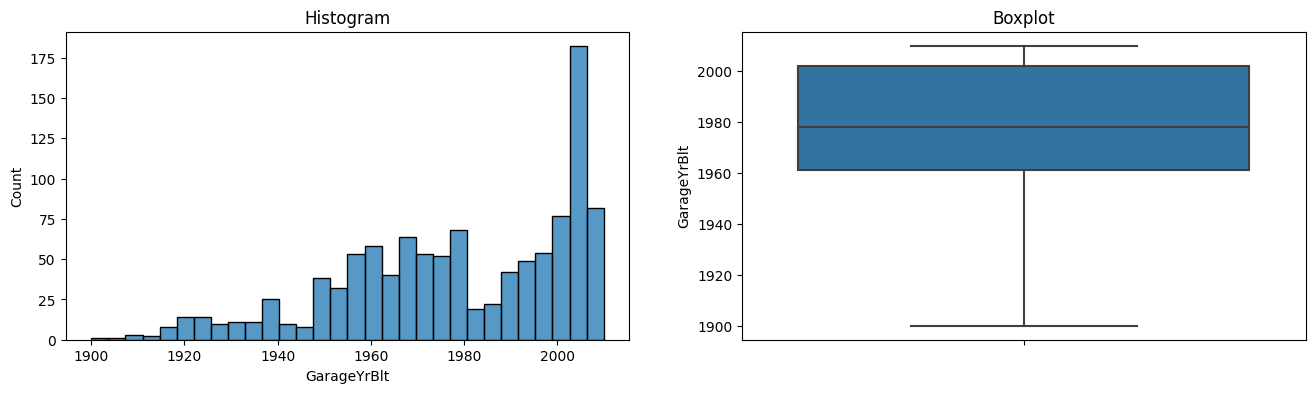

GarageCars - Before Capping


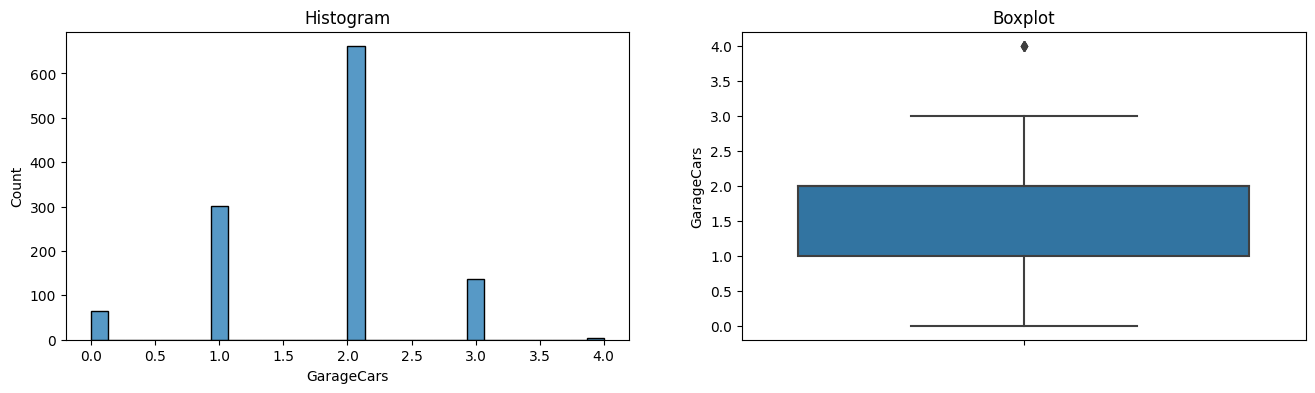


GarageCars - After Capping


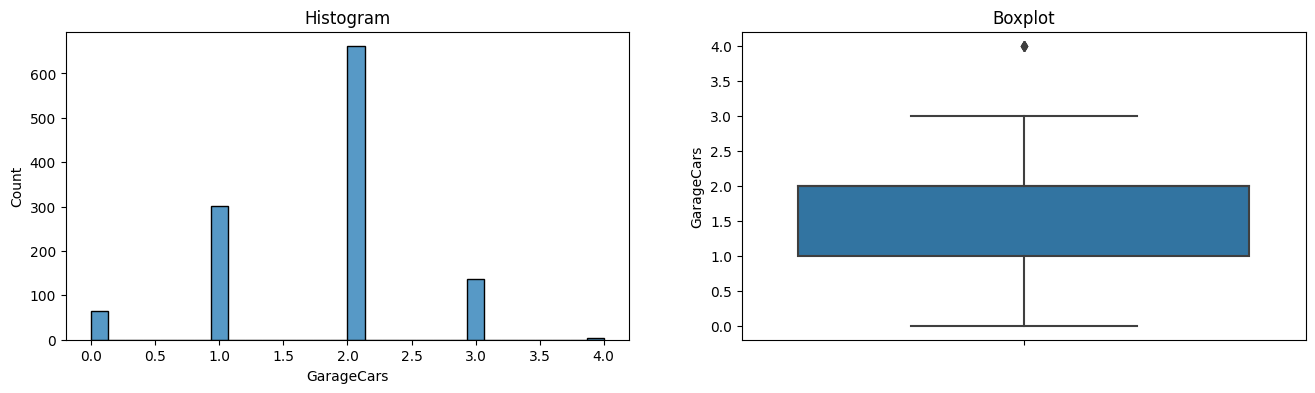

MoSold - Before Capping


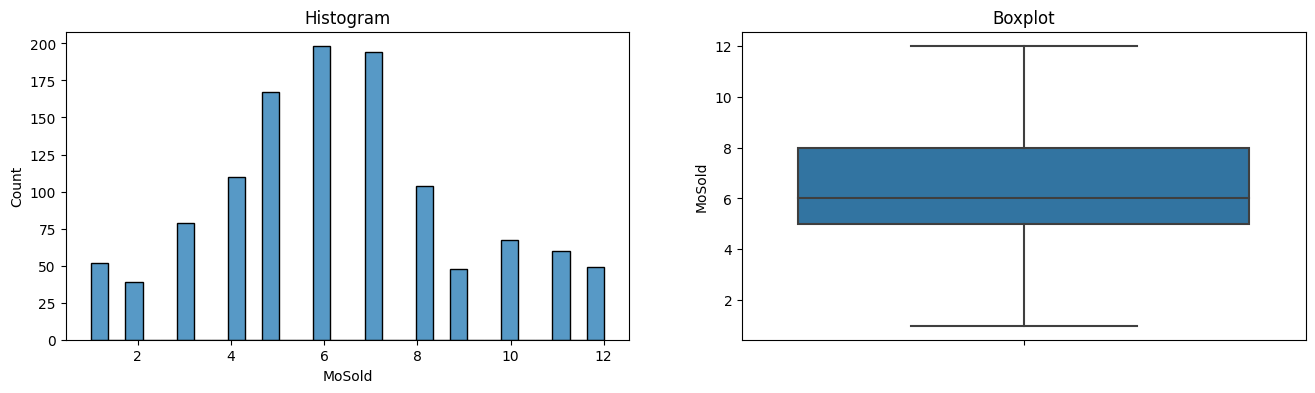


MoSold - After Capping


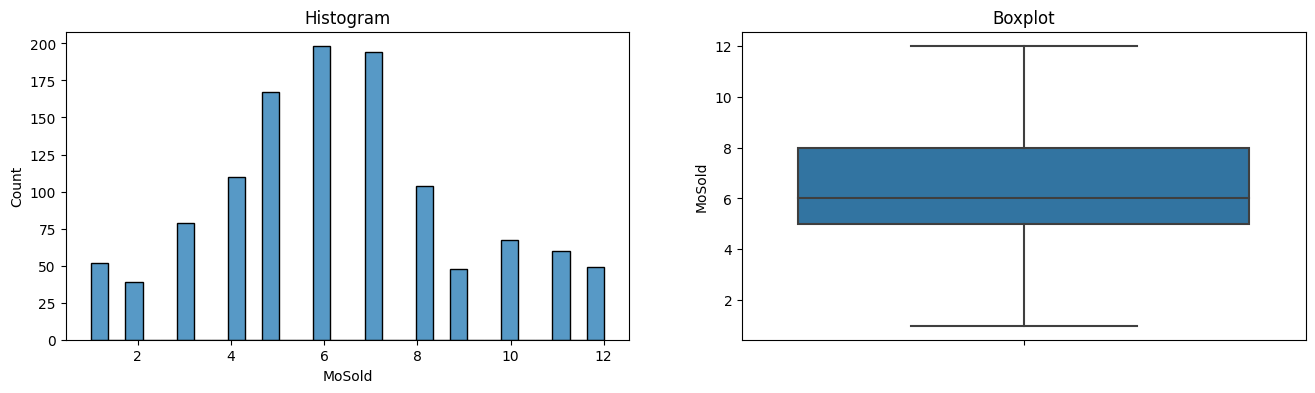

YrSold - Before Capping


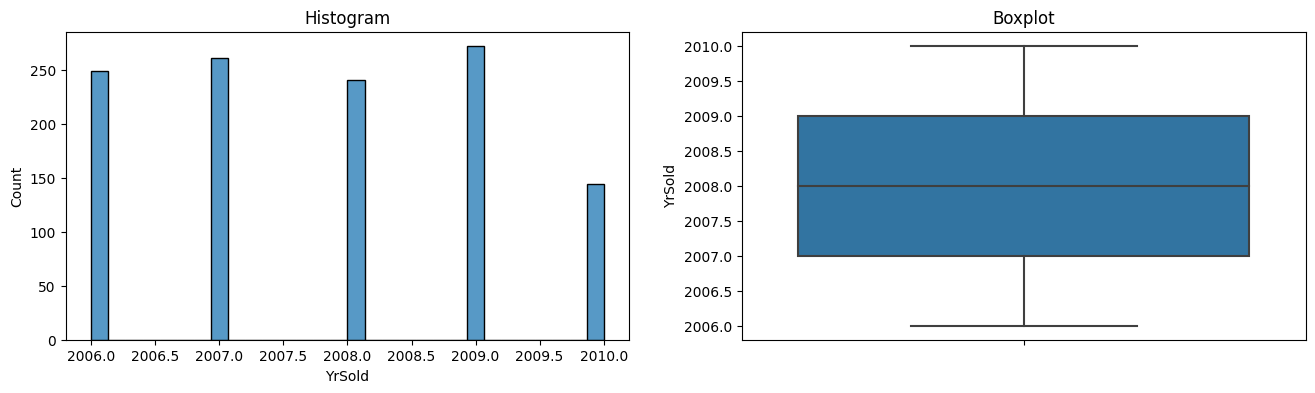


YrSold - After Capping


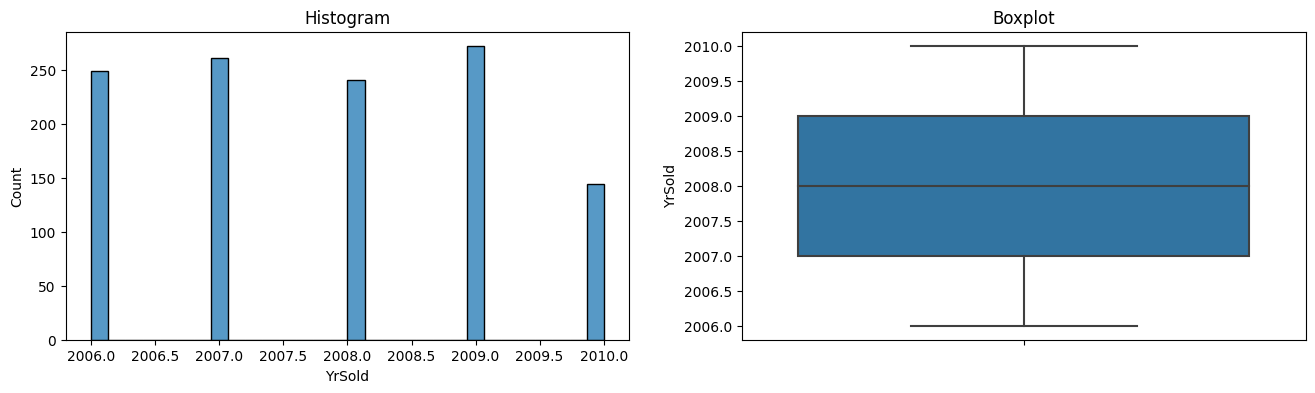

In [19]:
for col in continuous_cols + discrete_cols:
    print(f'{col} - Before Capping')
    diagnostic_plots(X_train, col)

    print(f'\n{col} - After Capping')
    diagnostic_plots(X_train_capped, col)

### Handling Missing Values

In [20]:
# Check missing values and filter columns with missing values
columns_with_missing_values = X_train_capped.columns[X_train.isna().sum() > 0]

# Got the columns that have missing value
missing_value_cols = columns_with_missing_values.tolist()

# Separated the columns into categorical and numerical
miss_num_cols = X_train_capped[missing_value_cols].select_dtypes(exclude='object').columns.tolist()
miss_cat_cols = X_train_capped[missing_value_cols].select_dtypes(include='object').columns.tolist()

**Categorical Column Missing Value**

In [21]:
# Analyze the missing value to decide the imputation value
analysis = []

for col in miss_cat_cols:
    analysis.append([col, X_train_capped[col].unique()])

print('Categorical Columns')
display(pd.DataFrame(analysis, columns=['column name', 'unique value']))

# Check for numerical columns
analysis = []

for col in miss_num_cols:
    analysis.append([col, X_train_capped[col].unique()])

print('Numerical Columns')
pd.DataFrame(analysis, columns=['column name', 'unique value'])

Categorical Columns


,column name,unique value
0,Alley,"[nan, Pave, Grvl]"
1,MasVnrType,"[None, BrkFace, Stone, nan, BrkCmn]"
2,BsmtQual,"[TA, Gd, Ex, Fa, nan]"
3,BsmtCond,"[TA, Fa, Gd, nan, Po]"
4,BsmtExposure,"[No, Av, Gd, Mn, nan]"
5,BsmtFinType1,"[Unf, LwQ, BLQ, GLQ, ALQ, Rec, nan]"
6,BsmtFinType2,"[Unf, Rec, GLQ, BLQ, ALQ, LwQ, nan]"
7,FireplaceQu,"[nan, Gd, TA, Po, Ex, Fa]"
8,GarageType,"[nan, Attchd, Detchd, BuiltIn, Basment, CarPort, 2Types]"
9,GarageFinish,"[nan, RFn, Unf, Fin]"


Numerical Columns


,column name,unique value
0,LotFrontage,"[50.0, 65.0, 52.0, 70.0, 92.0, 107.0, 38.0, 40.0, 58.0, 48.0, 36.0, 60.0, 44.0, 47.0, nan, 75.0, 80.0, 63.0, 56.0, 76.0, 85.0, 34.0, 91.0, 79.0, 41.0, 68.0, 54.0, 78.0, 49.0, 53.0, 77.0, 51.0, 90.0, 59.0, 74.0, 55.0, 84.0, 66.0, 81.0, 93.0, 95.0, 86.0, 100.0, 88.0, 98.0, 73.0, 102.0, 61.0, 103.0, 62.0, 69.0, 82.0, 72.0, 37.0, 71.0, 94.0, 43.0, 105.0, 64.0, 67.0, 104.0, 35.0, 57.0, 96.0, 89.0, 45.0, 87.0, 83.0, 101.0, 42.0, 97.0, 39.0, 99.0, 46.0]"
1,MasVnrArea,"[0.0, 92.0, 120.0, 448.0, 171.0, 351.0, 284.0, 106.0, 117.0, 294.0, 42.0, 360.0, 186.0, nan, 262.0, 292.0, 84.0, 246.0, 189.0, 320.0, 315.0, 306.0, 80.0, 45.0, 399.0, 336.0, 72.0, 381.0, 302.0, 66.0, 110.0, 168.0, 424.0, 210.0, 50.0, 223.0, 76.0, 99.0, 144.0, 28.0, 340.0, 108.0, 170.0, 300.0, 272.0, 335.0, 248.0, 151.0, 207.0, 359.0, 435.0, 90.0, 1.0, 244.0, 270.0, 180.0, 309.0, 140.0, 216.0, 130.0, 259.0, 178.0, 81.0, 16.0, 338.0, 30.0, 113.0, 100.0, 298.0, 247.0, 36.0, 266.0, 46.0, 219.0, 203.0, 310.0, 146.0, 95.0, 163.0, 56.0, 166.0, 164.0, 104.0, 74.0, 64.0, 149.0, 324.0, 97.0, 158.0, 304.0, 112.0, 194.0, 443.0, 125.0, 438.0, 238.0, 157.0, 165.0, 362.0, 243.0, ...]"
2,GarageYrBlt,"[nan, 2004.0, 1921.0, 1949.0, 1978.0, 1958.0, 2007.0, 1996.0, 1962.0, 1922.0, 2003.0, 1966.0, 1991.0, 1990.0, 2006.0, 1985.0, 1920.0, 1965.0, 1992.0, 1940.0, 1988.0, 1950.0, 1952.0, 1951.0, 2008.0, 1993.0, 1954.0, 1976.0, 1959.0, 1968.0, 1997.0, 1970.0, 1981.0, 2005.0, 1984.0, 1983.0, 1977.0, 1971.0, 2001.0, 1956.0, 1957.0, 1948.0, 1998.0, 1935.0, 1973.0, 1964.0, 1953.0, 1961.0, 2000.0, 1941.0, 1910.0, 2009.0, 1925.0, 1974.0, 2002.0, 1987.0, 1928.0, 1926.0, 1989.0, 1923.0, 1946.0, 1955.0, 1994.0, 1945.0, 1963.0, 1960.0, 1967.0, 1975.0, 1995.0, 1972.0, 1980.0, 1969.0, 1999.0, 1932.0, 1916.0, 1915.0, 1906.0, 1939.0, 1979.0, 1934.0, 1930.0, 1914.0, 1986.0, 1900.0, 1918.0, 1931.0, 1942.0, 2010.0, 1929.0, 1936.0, 1982.0, 1937.0, 1938.0, 1927.0, 1924.0, 1933.0, 1947.0]"


As we could see from the data above, 
- the missing value was caused because the house does not have the facilities therefore we will impute with `not have`
- *lot frontage*: Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood, we can fill in missing values by the **median** LotFrontage of the neighborhood.
- *MasVnrArea* : NA most likely means no masonry veneer for these houses. We can fill **0** for the area and None for the type.
- *GarageYrBlt* : Replacing missing data with **0**.

***References:*** [Click Here!](https://medium.com/@anushaswamy.n/house-prices-advanced-regression-techniques-a1e2a595af6b)

In [22]:
# Handle the missing value on categorical
for col in miss_cat_cols:
    # Impute the train set
    X_train_capped[col].fillna('not have', inplace=True)

    # Impute the test set
    X_test_capped[col].fillna('not have', inplace=True)

# Handle the missing value on numerical
# get the median of lot frontage from the train set and impute the value
median = X_train_capped['LotFrontage'].median()
X_train_capped['LotFrontage'].fillna(median, inplace=True)
X_test_capped['LotFrontage'].fillna(median, inplace=True)

# Impute the missing value with 0
X_train_capped['MasVnrArea'].fillna(0, inplace=True)
X_test_capped['MasVnrArea'].fillna(0, inplace=True)

# Impute the missing value with 0
X_train_capped['GarageYrBlt'].fillna(0, inplace=True)
X_test_capped['GarageYrBlt'].fillna(0, inplace=True)

# Check the result
print(f'Missing Values : {X_train_capped.isna().sum().sum()}')


Missing Values : 0


Great, the missing value already handled

### Feature Selection

**Correlation - Categorical Columns**

In [23]:
# Ordinal columns
ordinal_cols = ['LotShape', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 
                'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence']

# Set the significance level (alpha)
alpha = 0.05

# Perform Kendall's Tau test for each categorical column
correlation_df_categorical = pd.DataFrame(columns=['categorical_column', 'tau-statistic', 'p-value', 'is_correlated'])

for cat_column in ordinal_cols:
    # Convert categories to ordered numbers
    cat_column_num = X_train_capped[cat_column].astype('category').cat.codes
    y_train_num = y_train.astype('category').cat.codes
    
    tau, p = kendalltau(cat_column_num, y_train_num)
    
    is_correlated = 'Yes' if p < alpha else 'No'
    
    # Use pd.concat to concatenate the DataFrames
    correlation_df_categorical = pd.concat([
        correlation_df_categorical,
        pd.DataFrame({'categorical_column': [cat_column], 'tau-statistic': [tau], 'p-value': [p], 'is_correlated': [is_correlated]})
    ], ignore_index=True)

# Print the Kendall's Tau test results DataFrame for categorical columns
correlation_df_categorical


,categorical_column,tau-statistic,p-value,is_correlated
0,LotShape,-0.245216,2.296247e-25,Yes
1,Utilities,-0.014468,5.457960e-01,No
2,LandSlope,0.043133,7.070657e-02,No
3,ExterQual,-0.519234,2.078094e-108,Yes
4,ExterCond,0.114337,1.421513e-06,Yes
5,BsmtQual,-0.499003,2.959859e-106,Yes
6,BsmtCond,-0.072848,1.967598e-03,Yes
7,BsmtExposure,-0.249811,2.798031e-28,Yes
8,BsmtFinType1,-0.072592,7.080601e-04,Yes
9,BsmtFinType2,-0.042004,7.081069e-02,No


- Ordinal Column that has correlation : [`LotShape`, `ExterQual`, `ExterCond`, `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `HeatingQC`, `KitchenQual`, `Functional`, `FireplaceQu`, `GarageFinish`, `GarageQual`, `GarageCond`, `PavedDrive`, `PoolQC`, `Fence`]

In [24]:
# Nominal columns
nominal_cols = ['MSZoning', 'Street', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
                'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'GarageType', 'MiscFeature', 
                'SaleType', 'SaleCondition']

# Set the significance level (alpha)
alpha = 0.05

# Perform chi-squared test for each categorical column
correlation_df_categorical = pd.DataFrame(columns=['categorical_column', 'chi2-statistic', 'p-value', 'is_correlated'])

for cat_column in nominal_cols:
    contingency_table = pd.crosstab(X_train_capped[cat_column], y_train)
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    is_correlated = 'Yes' if p < alpha else 'No'
    
    # Use pd.concat to concatenate the DataFrames
    correlation_df_categorical = pd.concat([
        correlation_df_categorical,
        pd.DataFrame({'categorical_column': [cat_column], 'chi2-statistic': [chi2], 'p-value': [p], 'is_correlated': [is_correlated]})
    ], ignore_index=True)

# Print the chi-squared test results DataFrame for categorical columns
correlation_df_categorical

,categorical_column,chi2-statistic,p-value,is_correlated
0,MSZoning,2697.132461,9.779461e-09,Yes
1,Street,714.079694,5.708311e-05,Yes
2,Neighborhood,14414.531785,7.442536e-05,Yes
3,BldgType,2031.549175,9.999748e-01,No
4,HouseStyle,3863.918546,9.585263e-01,No
5,RoofStyle,2442.325008,1.000000e+00,No
6,RoofMatl,2491.439075,1.000000e+00,No
7,Exterior1st,7155.466038,9.944405e-01,No
8,Exterior2nd,8173.958841,1.384521e-01,No
9,MasVnrType,3111.564950,9.178713e-28,Yes


- Nominal Columns that have correlation : [`MSZoning`, `Street`, `Neighborhood`, `MasVnrType`, `Foundation`, `Heating`, `CentralAir`, `GarageType`, `SaleType`, `SaleCondition`]

In [25]:
# Continuous Variables
continuous_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 
                   '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
                   'ScreenPorch', 'PoolArea', 'MiscVal']

# Discrete Variables
discrete_cols = ['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 
                 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                 'MoSold', 'YrSold']

# Set the significance level (alpha)
alpha = 0.05

# Perform correlation test for each continuous and discrete column
correlation_df_num = pd.DataFrame(columns=['numerical column', 'correlation-statistic', 'p-value', 'is_correlated'])

for cont_column in continuous_cols + discrete_cols:
    corr, p = spearmanr(X_train_capped[cont_column], y_train)
    
    is_correlated = 'Yes' if p < alpha else 'No'
    
    # Use pd.concat to concatenate the DataFrames
    correlation_df_num = pd.concat([
        correlation_df_num,
        pd.DataFrame({'numerical column': [cont_column], 'correlation-statistic': [corr], 'p-value': [p], 'is_correlated': [is_correlated]})
    ], ignore_index=True)

# Print the correlation test results DataFrame for continuous columns
correlation_df_num


,numerical column,correlation-statistic,p-value,is_correlated
0,LotFrontage,0.360007,4.950207e-37,Yes
1,LotArea,0.455587,7.190220e-61,Yes
2,MasVnrArea,0.402806,9.441125e-47,Yes
3,BsmtFinSF1,0.288673,7.811908e-24,Yes
4,BsmtFinSF2,-0.035531,2.251844e-01,No
5,BsmtUnfSF,0.207045,9.139339e-13,Yes
6,TotalBsmtSF,0.607498,1.201941e-118,Yes
7,1stFlrSF,0.581306,1.927842e-106,Yes
8,2ndFlrSF,0.292759,1.699452e-24,Yes
9,LowQualFinSF,-0.089256,2.273679e-03,Yes


- Numerical columns that have correlation : [`LotFrontage`, `LotArea`, `MasVnrArea`, `BsmtFinSF1`, `BsmtUnfSF`, `TotalBsmtSF`, `1stFlrSF`, `2ndFlrSF`, `LowQualFinSF`, `GrLivArea`, `GarageArea`, `WoodDeckSF`, `OpenPorchSF`, `EnclosedPorch`, `3SsnPorch`, `ScreenPorch`, `PoolArea`, `MiscVal`, `OverallQual`, `OverallCond`, `YearBuilt`, `YearRemodAdd`, `BsmtFullBath`, `FullBath`, `HalfBath`, `BedroomAbvGr`, `KitchenAbvGr`, `TotRmsAbvGrd`, `Fireplaces`, `GarageYrBlt`, `GarageCars`, `MoSold`]

In [26]:
'''
Here are the lists of column that have correlation with the target
'''

# Ordinal columns
ordinal_cols = ['LotShape', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 
                'PavedDrive', 'PoolQC', 'Fence']

# Nominal columns
nominal_cols = ['MSZoning', 'Street', 'Neighborhood', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 
                'GarageType', 'SaleType', 'SaleCondition']

# Numerical columns
num_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
            'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
            'PoolArea', 'MiscVal', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 
            'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold']

print(f'final column that will be used are : {len(ordinal_cols+nominal_cols+num_cols)} columns in total')

final column that will be used are : 59 columns in total


From 81 columns, we will use 51 columns which means we will drop 25 columns

***Notes* :** In this notebook, we will ignore the correlation strength of the column, you could drop it if it has weak correlation too. 

### Encoding & Scaling

In this section, we will demonstrate how to conduct the encoding and scaling process. For more details, you could refer to **Feature Engineering : Part 2** course. The encoding and scaling process that we wil use in this section are :
- One Hot Encoding for nominal columns
- Ordinal Encoding for ordinal columns
- and RobustScaler for the numerical columns

In [27]:
# Separeted the train set into nominal, ordinal and numerical
X_train_cat_ohe = X_train_capped[nominal_cols]
X_train_cat_ordinal = X_train_capped[ordinal_cols]
X_train_num = X_train_capped[num_cols]

# Separeted the test set into nominal, ordinal and numerical
X_test_cat_ohe = X_test_capped[nominal_cols]
X_test_cat_ordinal = X_test_capped[ordinal_cols]
X_test_num = X_test_capped[num_cols]

We separated the data according to their treatment later

**Nominal Columns**

In [28]:
# Define the encoder
ohe_encoder = OneHotEncoder(handle_unknown='ignore')

# Fit the One Hot Encoder
ohe_encoder.fit(X_train_cat_ohe)

# Transform the train and test set
X_train_ohe_encoded = ohe_encoder.transform(X_train_cat_ohe).toarray()
X_test_ohe_encoded = ohe_encoder.transform(X_test_cat_ohe).toarray()

# Extract the feature name from encoder
encoded_cols = ohe_encoder.get_feature_names_out()

**Ordinal Columns**

In [29]:
# Define the order of categories for each column
categories = [
    ['Reg', 'IR1', 'IR2', 'IR3'],  # LotShape
    ['not have', 'Fa', 'TA', 'Gd', 'Ex'],  # ExterQual
    ['not have', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # ExterCond
    ['not have', 'Fa', 'TA', 'Gd', 'Ex'],  # BsmtQual
    ['not have', 'Po', 'Fa', 'TA', 'Gd'],  # BsmtCond
    ['not have', 'No', 'Mn', 'Av', 'Gd'],  # BsmtExposure
    ['not have', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # BsmtFinType1
    ['not have', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # HeatingQC
    ['not have', 'Fa', 'TA', 'Gd', 'Ex'],  # KitchenQual
    ['not have', 'Sev', 'Mod', 'Maj2', 'Min2', 'Min1', 'Maj1', 'Typ'],  # Functional
    ['not have', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # FireplaceQu
    ['not have', 'Unf', 'RFn', 'Fin'],  # GarageFinish
    ['not have', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # GarageQual
    ['not have', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # GarageCond
    ['not have', 'N', 'P', 'Y'],  # PavedDrive
    ['not have', 'Fa', 'Gd', 'Ex'],  # PoolQC
    ['not have', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']  # Fence
]

# Create the ordinal encoder
ordinal_encoder = OrdinalEncoder(categories=categories)

# Fit the Ordinal Encoder
ordinal_encoder.fit(X_train_cat_ordinal)

# Transform the train and test set
X_train_ordinal_encoded = ordinal_encoder.transform(X_train_cat_ordinal)
X_test_ordinal_encoded = ordinal_encoder.transform(X_test_cat_ordinal)


**Numerical Columns**

In [30]:
# Create the scaler
scaler = RobustScaler()

# Fit the scaler
scaler.fit(X_train_num)

# Transform the train and test set
X_train_scaled = scaler.transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

**Concatenate The Data**

In [31]:
# Concate the categorical and numerical train set together
X_train_final = np.concatenate([X_train_ohe_encoded,X_train_ordinal_encoded,X_train_scaled],axis=1)

# Make it into dataframe
X_train_final = pd.DataFrame(X_train_final, columns = encoded_cols.tolist() + ordinal_cols + num_cols)

# Concate the categorical and numerical train set together
X_test_final = np.concatenate([X_test_ohe_encoded,X_test_ordinal_encoded,X_test_scaled],axis=1)

# Make it into dataframe
X_test_final = pd.DataFrame(X_test_final, columns = encoded_cols.tolist() + ordinal_cols + num_cols)

# Show the result
print(f'Train set Final {X_train_final.shape}\n')
display(X_train_final.head())
print(f'Test set Final {X_test_final.shape}\n')
display(X_test_final.head())

Train set Final (1167, 122)



,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,...,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,MoSold
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,-1.0,0.0,-1.0,0.0,0.0,-1.0,-45.976744,-2.0,-0.333333
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.5,-1.0,0.627907,0.0,-0.666667
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,-1.0,0.0,-1.0,0.0,-1.0,-1.0,-1.302326,-1.0,0.000000
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,-1.0,1.0,0.0,0.0,0.5,0.0,-0.651163,-1.0,-0.666667
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.5,0.0,0.023256,0.0,0.333333


Test set Final (292, 122)



,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,...,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,MoSold
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.651163,0.0,-1.000000
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,-1.0,1.0,-1.0,0.0,-0.5,-1.0,0.232558,-1.0,1.000000
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.674419,0.0,-0.333333
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.488372,0.0,-1.333333
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.139535,-1.0,0.666667


Now the train and test set is are ready to modeling process

## Model Definition

In this notebook we will use simple linear regression as our model, we will ignore all the assumptions first as a learning process that focus on the modeling step-by-step process. Meanwhile the metrics those will we use as the model evaluation are :
- MAE
- MSE
- RMSE
- R2-score

In [32]:
# Define the model
model = LinearRegression()

## Model Training

In this section we only fit the model into training set as training process

In [33]:
# Train the model
model.fit(X_train_final, y_train)

LinearRegression()

## Model Evaluation

In [34]:
# Dataframe that hold the result
result = pd.DataFrame(columns=['Model', 'Data', 'MAE_train', 'MAE_test','MSE_train','MSE_test', 'RMSE_train',
                                'RMSE_test', 'R2_train', 'R2_test'])

# Create function for model evaluation
def evaluate_model(dataframe, train_x, train_y, test_x, test_y, model, data_name):

    # Predict Train set
    y_pred_train = model.predict(train_x)
    # Predict test set
    y_pred_test = model.predict(test_x)

    # Calculate MAE
    mae_train = mean_absolute_error(train_y, y_pred_train)
    mae_test = mean_absolute_error(test_y, y_pred_test)

    # Calculate MSE
    mse_train = mean_squared_error(train_y, y_pred_train)
    mse_test = mean_squared_error(test_y, y_pred_test)
    
    # Calculate RMSE
    rmse_train = mean_squared_error(train_y, y_pred_train, squared=False)
    rmse_test = mean_squared_error(test_y, y_pred_test, squared=False)

    # Calculate R2 score
    r2_train = r2_score(train_y, y_pred_train)
    r2_test = r2_score(test_y, y_pred_test)
    
    # Add the scores to the dataframe
    new_row = {'Model': model, 'Data': data_name, 'MAE_train': mae_train, 'MAE_test': mae_test, 'MSE_train': mse_train,
                'MSE_test': mse_test, 'RMSE_train': rmse_train, 'RMSE_test': rmse_test,
                'R2_train': r2_train, 'R2_test':r2_test}
    
    dataframe = dataframe.append(new_row, ignore_index=True)

    return dataframe 

In [35]:
# Data with outliers
result = evaluate_model(result, X_train_final, y_train, X_test_final, y_test, model, 'With Capping')
result

,Model,Data,MAE_train,MAE_test,MSE_train,MSE_test,RMSE_train,RMSE_test,R2_train,R2_test
0,LinearRegression(),With Capping,17397.759065,19794.6455,7.545740e+08,1.053200e+09,27469.509776,32453.049793,0.877557,0.845858


Based on the evaluation metrics of Linear Regression model, here are some insights:

1. **Model Performance**: The model has a fairly high R-squared value for both the training set (0.878) and the test set (0.846). This indicates that the model explains approximately 87.8% of the variance in the training target variable, and 84.6% of the variance in the test target variable. This suggests that the model fits the data quite well and has a good predictive power.

2. **Overfitting/Underfitting**: The difference between the training and test scores (MAE, MSE, RMSE, R2) is relatively small. This suggests that the model is not overfitting (where the model performs significantly better on the training data than on the test data) or underfitting (where the model performs poorly on both the training and test data).

3. **Error Metrics**: The Mean Absolute Error (MAE) for the test set is slightly higher than for the training set (19794.65 vs 17397.76). This is expected as models usually perform slightly worse on unseen data. The Root Mean Squared Error (RMSE) for the test set is also higher than for the training set (32453.05 vs 27469.51), indicating a similar trend.

In conclusion, your Linear Regression model shows a good performance with the capped data. However, there's always room for improvement. You could consider trying different preprocessing steps, feature engineering, or even different models to further improve the performance. Remember to always validate your model with a separate test set to ensure its generalization ability.